In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
%autoreload 2
from src.pySRM.pysrm.imzml import IMZMLExtract
%autoreload 2
from src.pySRM.pysrm.comparative import CombinedSpectra

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


Load an imzML file

In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


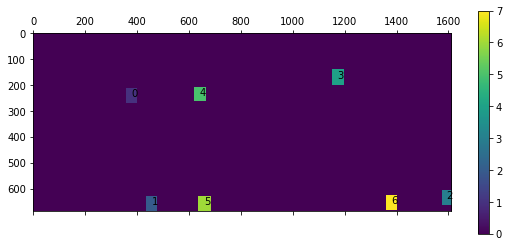

{0: ((356, 400, 215, 273), 2655),
 1: ((436, 478, 632, 687), 2408),
 2: ((1572, 1612, 608, 666), 2419),
 3: ((1149, 1197, 142, 205), 3136),
 4: ((618, 666, 211, 266), 2744),
 5: ((633, 684, 630, 688), 3068),
 6: ((1357, 1400, 628, 686), 2596)}

In [3]:
imze.list_regions()

Start with prozessing the first region , region 0

In [4]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% (2655 of 2655) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (2655 of 2655) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
Started Log Value: 0.14000733569264412
100% (45 of 45) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% (45 of 45) |########################| Elapsed Time: 0:00:16 Time:  0:00:16
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [5]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 1 with shape (43, 56, 17900)
Fetching region spectra
100% (2408 of 2408) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (2408 of 2408) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
Started Log Value: 0.17063884288072587
100% (43 of 43) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% (43 of 43) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412


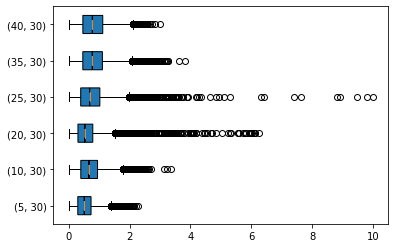

In [6]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976


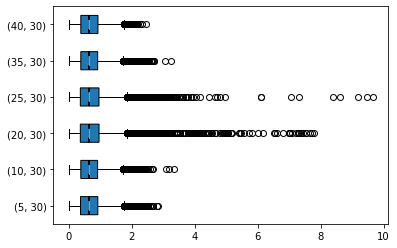

In [7]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599


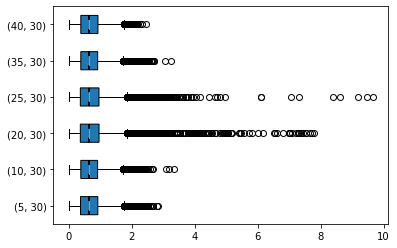

In [8]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587


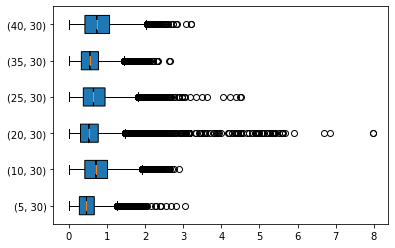

In [9]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338


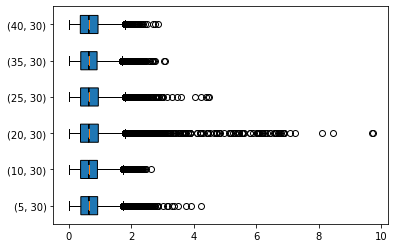

In [10]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.4103202798662151


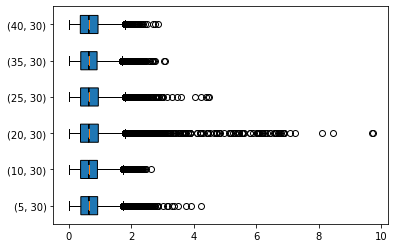

In [11]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


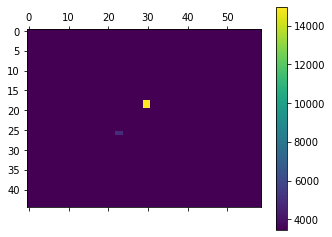

2655 45.060471276429595 282.8224196423905 133.18045036950951


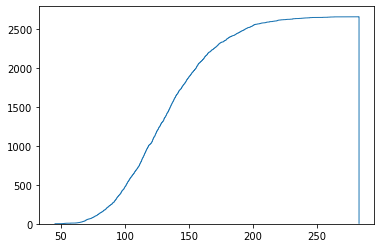

In [12]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

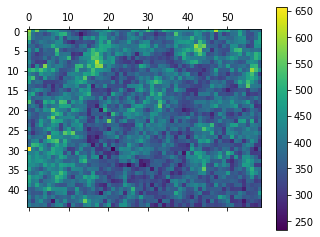

In [13]:
imze.plot_tnc(spectra0)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [14]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [15]:
spec.calculate_similarity(mode="spectra_log")

2020-09-29 14:22:04,896  SpectraRegion  INFO: dimensions inputarray: 17900
2020-09-29 14:22:04,897  SpectraRegion  INFO: Creating C++ obj
2020-09-29 14:22:04,897  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-09-29 14:22:04,898  SpectraRegion  INFO: dimensions 17900
2020-09-29 14:22:04,898  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-09-29 14:22:04,899  SpectraRegion  INFO: Switching to dot mode
2020-09-29 14:22:04,935  SpectraRegion  INFO: Starting calc similarity c++
2020-09-29 14:22:53,165  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-09-29 14:22:53,166  SpectraRegion  INFO: Calculating spectra similarity
2020-09-29 14:22:53,191  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [16]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=1000)

2020-09-29 14:22:53,211  SpectraRegion  INFO: Calculating clusters
2020-09-29 14:22:53,212  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2020-09-29 14:22:53,271  SpectraRegion  INFO: UMAP reduction
2020-09-29 14:23:17,098  SpectraRegion  INFO: HDBSCAN reduction
2020-09-29 14:23:17,098  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (1000, 2)
2020-09-29 14:23:17,123  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-09-29 14:23:17,377  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 16)
2020-09-29 14:23:17,378  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 16)
2020-09-29 14:23:17,379  SpectraRegion  INFO: HDBSCAN Labeling
2020-09-29 14:23:17,384  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-09-29 14:23:17,384  SpectraRegion  INFO: Cluster Reduction
2020-09-29 14:23:17,385  SpectraRegion  INFO: Calculating consensus spectra
2020-09-29 14:23:17,414  SpectraRegion  INFO: Setting consensus spectra
2020-09-29 14:23:17

[[1.64605597e-02 0.00000000e+00 1.38138329e-01 ... 7.33907573e-02
  9.05449087e-02 8.21037461e-02]
 [1.65301206e-02 0.00000000e+00 1.35376891e-01 ... 7.34638417e-02
  9.00128543e-02 8.12850118e-02]
 [9.78096199e-03 1.06929492e-01 9.04289470e-02 ... 4.43981079e-02
  5.58661252e-02 5.05814715e-02]
 ...
 [2.51140533e-06 1.94122173e-05 1.64691444e-04 ... 5.15193202e-05
  3.36888447e-05 3.06979682e-05]
 [6.06341568e-03 1.01693160e-02 1.47655771e-02 ... 1.40934732e-01
  9.28742481e-02 8.48650433e-02]
 [1.99033216e-06 1.56392612e-05 1.33416124e-04 ... 2.28793293e-02
  1.44202390e-02 1.30711144e-02]]


array([[ 6,  6,  5, ...,  1,  1,  1],
       [ 6,  5,  4, ...,  2,  1,  7],
       [ 6,  5,  4, ...,  3,  1,  8],
       ...,
       [ 5,  5,  6, ...,  3,  1,  1],
       [ 5,  4,  6, ...,  3,  3, 11],
       [ 5,  6,  6, ..., 11,  3, 11]], dtype=int16)

In [17]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=9, num_samples=500)

2020-09-29 14:23:17,504  SpectraRegion  INFO: HDBSCAN reduction
2020-09-29 14:23:17,505  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (500, 2)
2020-09-29 14:23:17,523  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-09-29 14:23:17,751  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 3)
2020-09-29 14:23:17,752  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 3)
2020-09-29 14:23:17,753  SpectraRegion  INFO: HDBSCAN Labeling


[[1.93513244e-01 8.18136250e-02 1.47516934e-01]
 [1.90904604e-01 7.95962381e-02 1.41591758e-01]
 [1.96438620e-01 8.28323593e-02 1.54697937e-01]
 ...
 [7.28280613e-08 9.69838495e-08 9.99999824e-01]
 [2.27375229e-03 2.64583480e-03 9.95080407e-01]
 [7.20939857e-04 9.25083936e-04 9.91531423e-01]]


In [18]:
len(spec.dimred_labels)

2655

2020-09-29 14:23:17,803  SpectraRegion  INFO: Pixels    : 2655
2020-09-29 14:23:17,804  SpectraRegion  INFO: Unassigned: 0


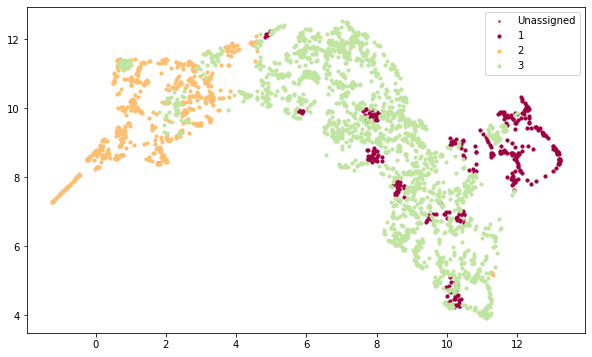

In [19]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

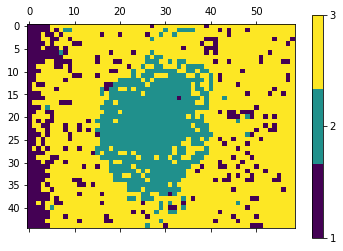

In [20]:
spec.plot_segments()

In [21]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-29 14:23:18,129  SpectraRegion  INFO: Assigning clusters to background: {1, 3}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

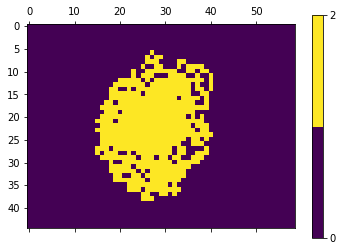

In [22]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [23]:
spec.segment(method="WARD", number_of_regions=15)

2020-09-29 14:23:18,258  SpectraRegion  INFO: Calculating clusters
2020-09-29 14:23:18,382  SpectraRegion  INFO: Calculating clusters done
2020-09-29 14:23:18,398  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

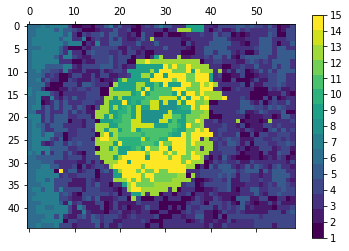

In [24]:
spec.plot_segments()

In [25]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-29 14:23:18,537  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

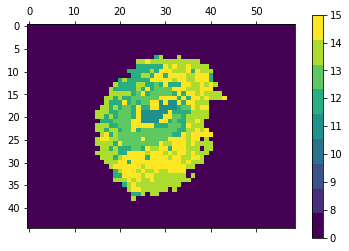

In [26]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [27]:
spec.segmented[0:6,] = 0

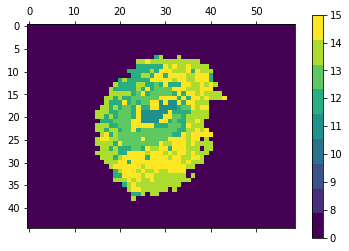

In [28]:
spec.plot_segments()

Consensus Analysis

In [29]:
spec.consensus_spectra()

2020-09-29 14:23:18,798  SpectraRegion  INFO: Calculating consensus spectra
2020-09-29 14:23:18,827  SpectraRegion  INFO: Setting consensus spectra
2020-09-29 14:23:18,828  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [30]:
spec.consensus_similarity()

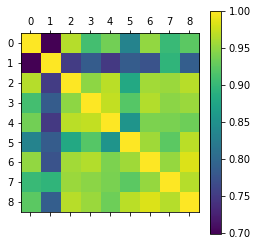

In [31]:
spec.plot_consensus_similarity()

2020-09-29 14:23:19,029  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2020-09-29 14:23:19,030  SpectraRegion  INFO: Processing clusterLabel 0
2020-09-29 14:24:31,263  SpectraRegion  INFO: Processing clusterLabel 8
2020-09-29 14:24:31,284  SpectraRegion  INFO: Processing clusterLabel 9
2020-09-29 14:24:31,483  SpectraRegion  INFO: Processing clusterLabel 10
2020-09-29 14:24:31,515  SpectraRegion  INFO: Processing clusterLabel 11
2020-09-29 14:24:31,566  SpectraRegion  INFO: Processing clusterLabel 12
2020-09-29 14:24:31,662  SpectraRegion  INFO: Processing clusterLabel 13
2020-09-29 14:24:31,948  SpectraRegion  INFO: Processing clusterLabel 14
2020-09-29 14:24:31,978  SpectraRegion  INFO: Processing clusterLabel 15


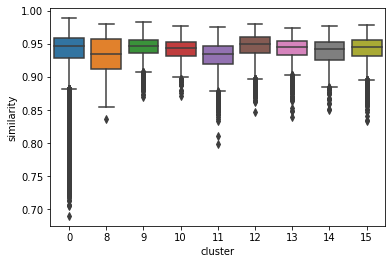

In [32]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [33]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

2020-09-29 14:24:33,367  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


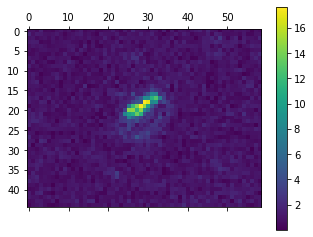

array([[0.82385149, 0.86264522, 0.49721109, ..., 0.24492729, 0.86041828,
        0.65921243],
       [1.87043287, 0.78807366, 1.3411693 , ..., 0.4120491 , 0.9107944 ,
        1.00745731],
       [0.95879405, 1.16647921, 0.54069431, ..., 0.90882606, 0.74983204,
        1.82300519],
       ...,
       [1.20795686, 0.93115886, 0.90644756, ..., 0.73014098, 1.17134226,
        1.13743474],
       [0.62210889, 0.69715361, 1.27652689, ..., 1.65667113, 0.7134432 ,
        1.15874405],
       [0.26637443, 0.77544398, 1.02433959, ..., 0.29809782, 0.75653545,
        1.09764161]])

In [34]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

2020-09-29 14:24:33,491  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


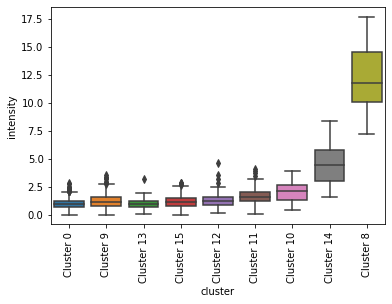

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


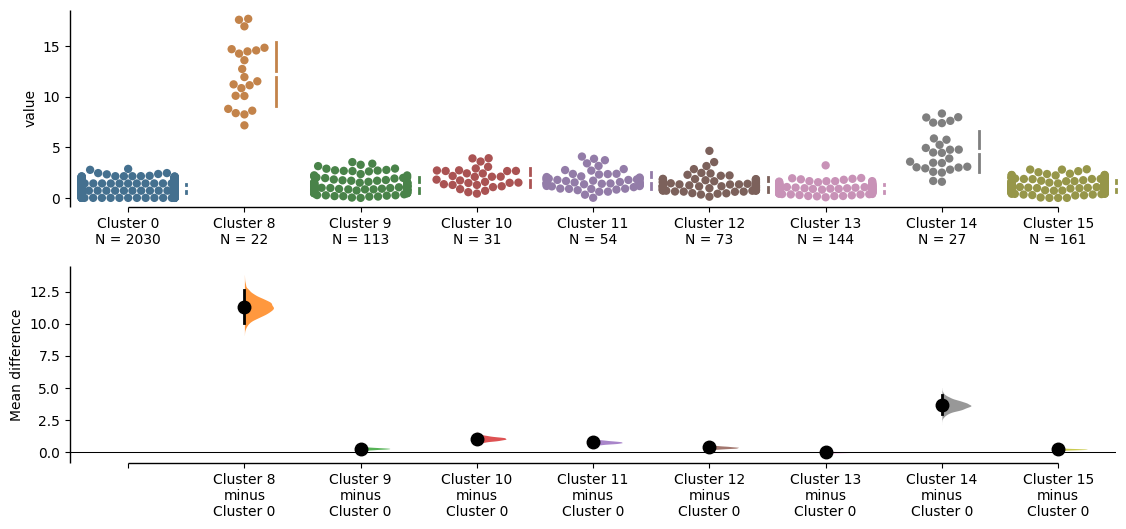

In [35]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

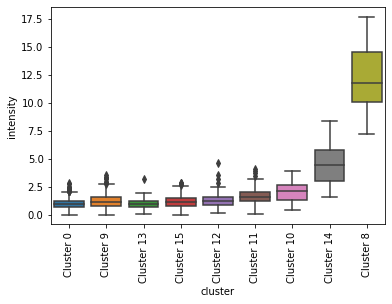

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


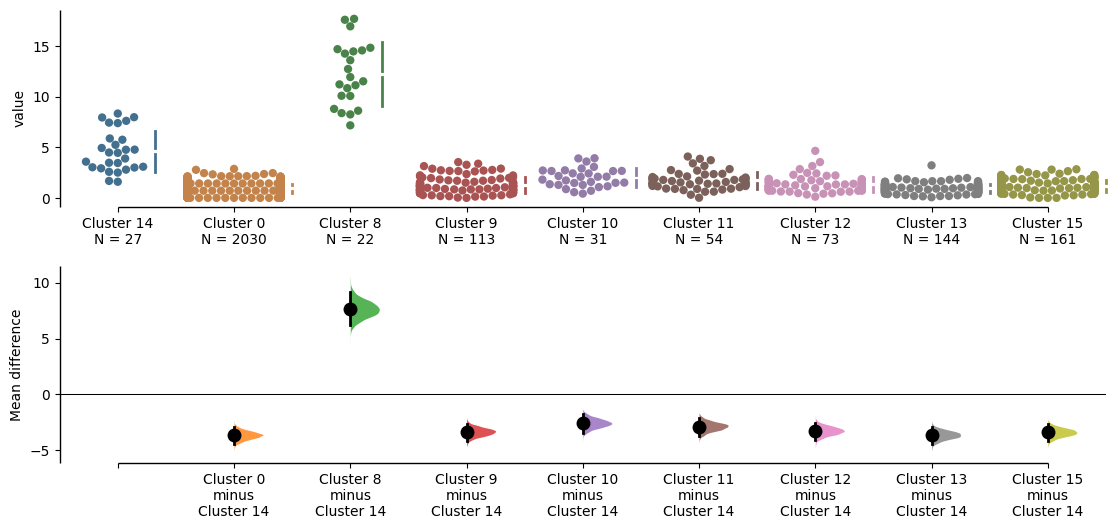

In [36]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

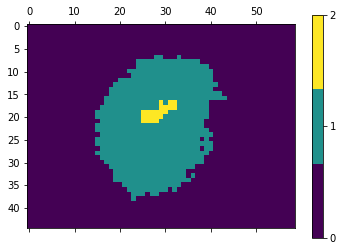

In [37]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

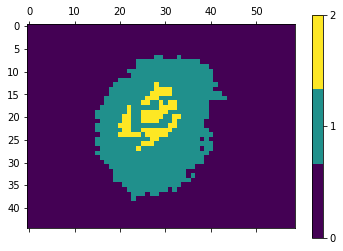

In [38]:
spec.plot_segments(highlight=[8,11])

Just for the sake of clarity: we now remove all differential expression results!

In [39]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [40]:
pw = ProteinWeights("protein_weights.tsv")

With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [41]:
pw.get_protein_from_mass(14954)

[('Ifitm3', 14954.0)]

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [42]:
mgenes = spec.find_all_markers(pw, includeBackground=False,
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest", "rank"])

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [43]:
mgenes["ttest"]

clusterID               gene_ident     gene_mass    gene  protein_mass  \
0           9  mass_14921_268565752678  14921.268566  Mrps14       14920.0   
1           9  mass_14922_777698966001  14922.777699  Mrps14       14920.0   
2           9  mass_14951_451230019162  14951.451230  Ifitm3       14954.0   
3           9  mass_14952_960363232487  14952.960363  Ifitm3       14954.0   
4           9   mass_14954_46949644581  14954.469496    Pfn1       14957.0   
..        ...                      ...           ...     ...           ...   
479         8  mass_29923_561839409052  29923.561839    Cerk       29922.0   
480         8  mass_29946_198837608918  29946.198838  Exosc8       29949.0   
481         8   mass_29947_70797082224  29947.707971  Exosc8       29949.0   
482         8  mass_29949_217104035568  29949.217104  Exosc8       29949.0   
483         8   mass_29950_72623724889  29950.726237  Exosc8       29949.0   

     avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
0    -0.509849  0.000152  113   107  0.620672  0.575942     512      502   
1    -0.502858  0.000128  113   110  0.649218  0.607433     512      505   
2    -0.578191  0.000027  113   112  1.147351  0.982435     512      510   
3    -0.591802  0.000022  113   112  1.182339  1.007231     512      510   
4    -0.617750  0.000017  113   112  1.242006  1.097036     512      509   
..         ...       ...  ...   ...       ...       ...     ...      ...   
479   1.031802  0.000024   22    22  0.697700  0.669247     603      576   
480   0.821618  0.001020   22    22  0.568648  0.520686     603      567   
481   0.759363  0.004251   22    22  0.532271  0.524174     603      564   
482   0.692339  0.012194   22    22  0.512144  0.526945     603      568   
483   0.638204  0.022129   22    22  0.499968  0.485754     603      569   

      mean_bg  median_bg  
0    0.883775   0.676926  
1    0.919954   0.700307  
2    1.712968   1.118923  
3    1.781937   1.146525  
4    1.905835   1.199646  
..        ...        ...  
479  0.341244   0.336632  
480  0.321745   0.313734  
481  0.314443   0.302384  
482  0.316940   0.297317  
483  0.321236   0.290991  

[1280 rows x 15 columns]

In [44]:
mgenes_bg = spec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

In [45]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15))),
 ('rank', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('rank', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('rank', ((15,), (8, 9, 10, 11, 12, 13, 14)

It's also easy to save the result to disk:

In [46]:
markerGenes = mgenes["ttest"]
markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

In [47]:
markerGenesBG = mgenes_bg["ttest"]
markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [48]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 230


In [49]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 382


In order to save the results, the SpectraRegion object can be pickled:

In [50]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [51]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2020-09-29 14:32:31--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19718 (19K) [text/plain]
Saving to: ‘analyseMarkers.py.4’

analyseMarkers.py.4 100%[===================>]  19.26K  --.-KB/s    in 0.03s   

2020-09-29 14:32:31 (731 KB/s) - ‘analyseMarkers.py.4’ saved [19718/19718]



In [52]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 41
known (celltype, organ) 57
8	Monocytes;Immune system	3.919451391214282	1	2	1	1	{'IFITM3'}	{'IFITM3'}
8	Gamma delta T cells;Immune system	1.3745893243900065	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Monocytes;Immune system	0.0	1	2	1	1	{'IFITM3'}	{'IFITM3'}
10	Chondrocytes;Connective tissue	0.0	1	1	0	0	set()	{'MIF'}
10	Dendritic cells;Immune system	0.0	1	1	0	0	set()	{'MIF'}
11	Basophils;Immune system	0.0	1	1	0	0	set()	{'IFITM1'}
11	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
12	Hepatocytes;Liver	5.67040959303626	2	5	1	2	{'APOA2'}	{'APOA2', 'TTR'}
12	Adipocytes;Connective tissue	0.25198926968105145	1	3	1	2	{'APOC1'}	{'APOC1'}
13	Hepatic stellate cells;Liver	0.1335441840259661	1	1	0	0	se

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)

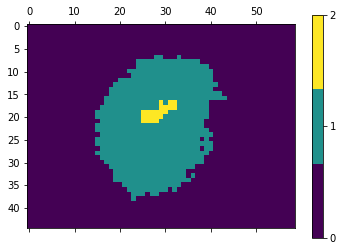

In [53]:
spec.plot_segments(highlight=(8))

In [54]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 64
known (celltype, organ) 67
0	Hepatocytes;Liver	0.13486368599343374	2	6	1	2	{'APOA2'}	{'APOA2', 'HAMP'}
0	Hepatic stellate cells;Liver	0.11900939193698404	2	3	0	0	set()	{'RBP1', 'TAGLN'}
8	Hepatocytes;Liver	7.4294253179313365	4	6	1	2	{'APOA2'}	{'TTR', 'SAT2', 'APOA2', 'HAMP'}
8	Gamma delta T cells;Immune system	1.3745893243900065	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
9	Hepatic stellate cells;Liver	0.0	1	3	0	0	set()	{'RBP1'}
10	Monocytes;Immune system	1.4806431667077773	3	4	3	3	{'RHOC', 'MGMT', 'IFITM3'}	{'RHOC', 'MGMT', 'IFITM3'}
10	Mast cells;Immune system	1.2704148622346776	2	2	1	1	{'SOCS2'}	{'SOCS2', 'PCP4L1'}
11	Monocytes;Immune syst

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

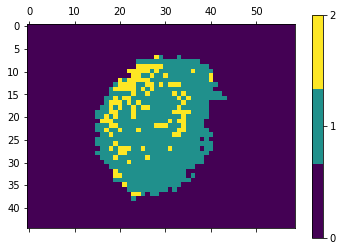

In [55]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [56]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [57]:
!ls slided_test

slided.0.0.tsv	 slided.0.12.tsv  slided.0.15.tsv  slided.0.info
slided.0.10.tsv  slided.0.13.tsv  slided.0.8.tsv   slided.0.upgma.png
slided.0.11.tsv  slided.0.14.tsv  slided.0.9.tsv


# Preparations for CombinedSpectra - A comparative analysis

100% (2408 of 2408) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (2408 of 2408) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


3454.87441091502 6
3456.383544128344 106
3457.8926773416683 2282
4749.710707947227 13
6651.218556735783 1


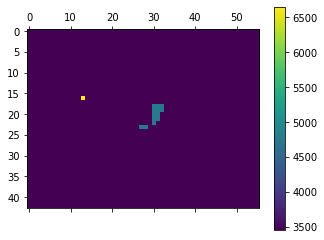

2408 9.853284 151.79816 62.364425739972695


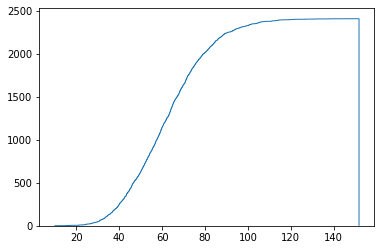

Got spectra (43, 56, 17900)


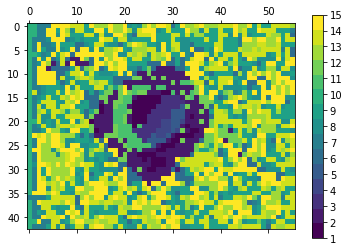

In [58]:
spectra1 = imze.get_region_array(1, makeNullLine=True)
imze.normalize_region_array(spectra1, normalize="vector")
imze.list_highest_peaks(spectra1, counter=True)
print("Got spectra", spectra1.shape)

spec1 = SpectraRegion(spectra1, imze.mzValues)
spec1.calculate_similarity(mode="spectra_log_dist")
spec1.segment(method="WARD", number_of_regions=15)
spec1.plot_segments()

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [59]:
pw = ProteinWeights("protein_weights.tsv")

def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    rspec.consensus_similarity()
    rspec.plot_consensus_similarity()
    
    mgenes = None
    mgenes_bg = None
    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest", "rank"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])
    
    return rspec, mgenes, mgenes_bg
    

First set the logging level to warn, to remove too many messages ...

In [60]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.WARN)

  5% (135 of 2655) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:02

Processing regionID 0 for basename slideD


100% (2655 of 2655) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (2655 of 2655) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (45 of 45) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (45 of 45) |########################| Elapsed Time: 0:00:15 Time:  0:00:15


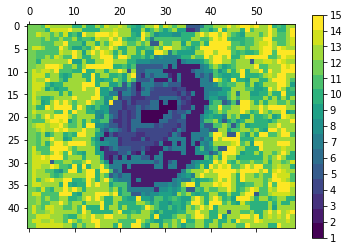

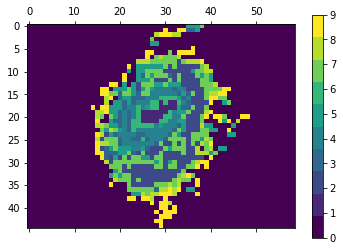

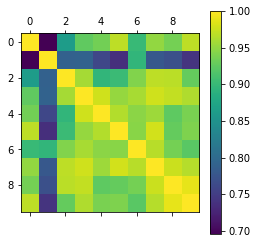

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
  5% (122 of 2408) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:02

Processing regionID 1 for basename slideD


100% (2408 of 2408) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (2408 of 2408) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (43 of 43) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (43 of 43) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


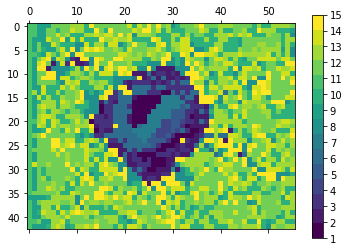

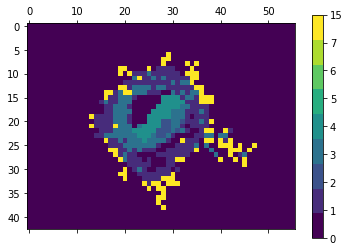

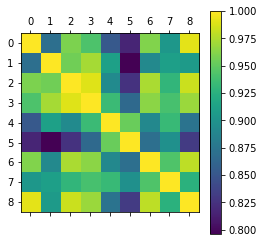

In [61]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

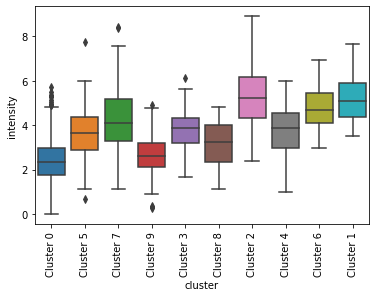

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


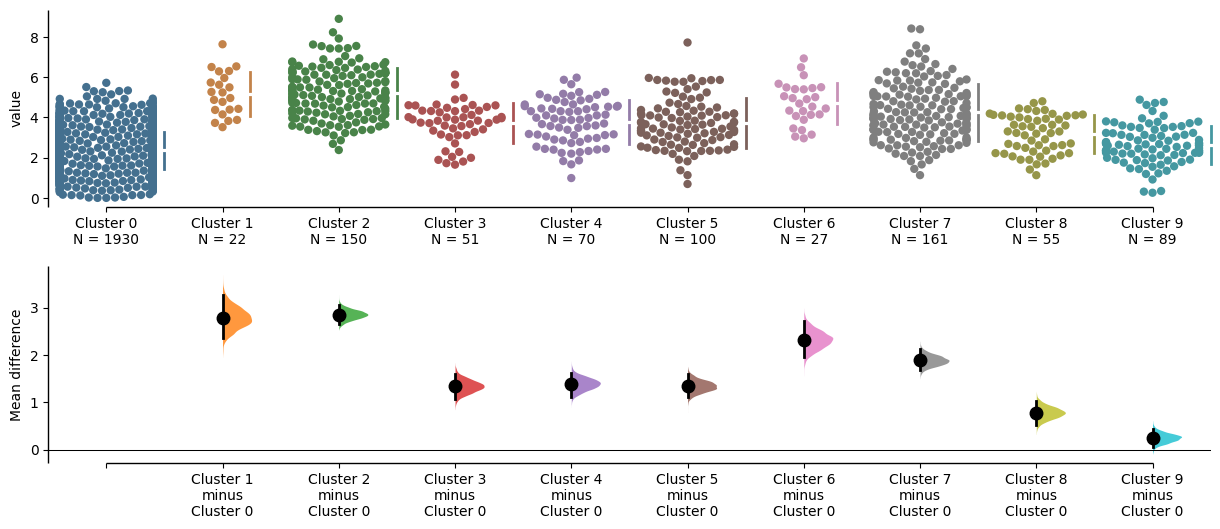

In [62]:
slided_0.mass_dabest(pw.protein2mass.get("Tmsb4x"))

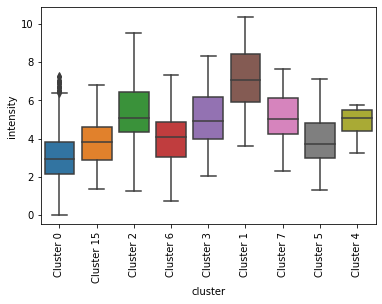

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


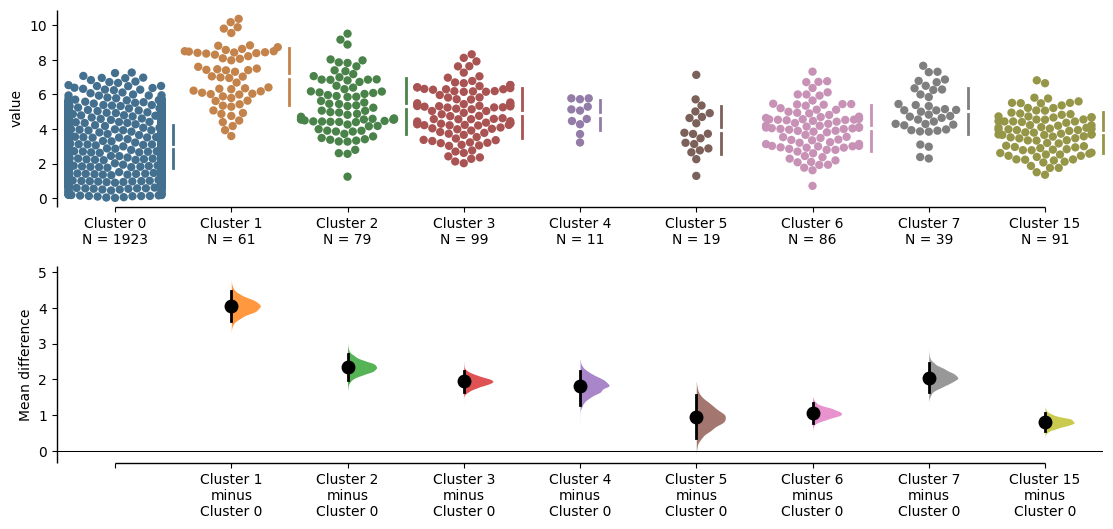

In [63]:
slided_1.mass_dabest(pw.protein2mass.get("Tmsb4x"))

  5% (139 of 2744) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:03

Processing regionID 4 for basename slideD


100% (2744 of 2744) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (2744 of 2744) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (49 of 49) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (49 of 49) |########################| Elapsed Time: 0:00:15 Time:  0:00:15


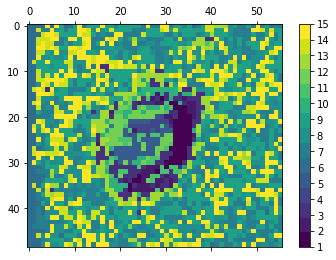

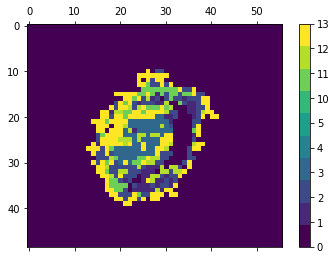

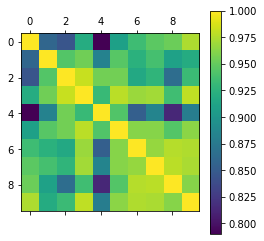

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
  2% (78 of 3068) |                      | Elapsed Time: 0:00:00 ETA:  00:00:00

Processing regionID 5 for basename slideD


100% (3068 of 3068) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (3068 of 3068) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (52 of 52) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (52 of 52) |########################| Elapsed Time: 0:00:18 Time:  0:00:18


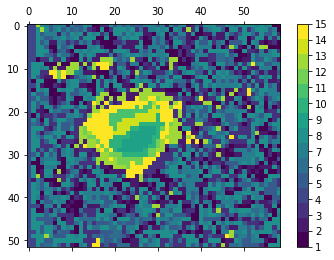

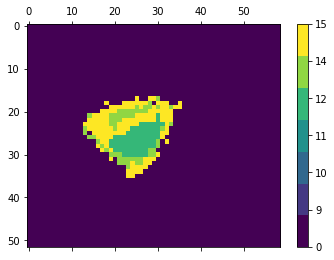

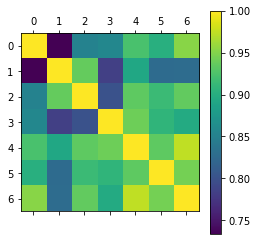

In [64]:
slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [65]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.INFO)

In [66]:
markerGenes0 = slided0_mgenes["ttest"]
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes["ttest"]
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes["ttest"]
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes["ttest"]
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [67]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 38
known (celltype, organ) 50
1	Monocytes;Immune system	7.838902782428564	1	1	1	1	{'IFITM3'}	{'IFITM3'}
1	Gamma delta T cells;Immune system	2.749178648780013	1	1	1	1	{'H2AFX'}	{'H2AFX'}
2	Megakaryocytes;Immune system	0.2594805636904732	1	1	0	0	set()	{'PF4'}
2	Platelets;Blood	0.043301022926521056	1	3	0	2	set()	{'PF4'}
4	Mast cells;Immune system	0.07967096968723586	1	1	0	0	set()	{'PCP4L1'}
4	Smooth muscle cells;Smooth muscle	0.03983548484361793	1	2	0	0	set()	{'PCP4L1'}
5	Monocytes;Immune system	0.0	1	1	1	1	{'IFITM3'}	{'IFITM3'}
6	Monocytes;Immune system	2.9050225537707983	1	1	1	1	{'IFITM3'}	{'IFITM3'}
6	Gamma delta T cells;Immune system	1.6411382296388108	1	1	1	1	{'H2AFX'}	{'H2AFX

In [68]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 7 clusters.
Starting analysis
Loaded Databases
known genes 26
known (celltype, organ) 41
1	Megakaryocytes;Immune system	0.1500766481068576	1	2	0	0	set()	{'PF4'}
1	Gamma delta T cells;Immune system	0.1001032894796462	1	1	0	0	set()	{'IFITM1'}
4	B cells;Immune system	0.02204693040509172	1	1	0	0	set()	{'CD79A'}
4	B cells naive;Immune system	0.02172077170430471	1	1	0	0	set()	{'CD79A'}
5	Basophils;Immune system	0.0	2	2	0	0	set()	{'IGFBP7', 'IFITM1'}
5	Endothelial cells;Vasculature	0.0	2	3	0	0	set()	{'IGFBP7', 'CD9'}
7	Adipocytes;Connective tissue	0.8440981382003979	1	2	1	1	{'APOC1'}	{'APOC1'}
7	Cardiomyocytes;Heart	0.0	1	1	0	0	set()	{'HAMP'}
15	Cardiomyocytes;Heart	0.050722313430917945	1	1	0	0	set()	{'HAMP'}
15	Smooth muscle cells;Smooth musc

In [69]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 33
known (celltype, organ) 47
1	Cardiomyocytes;Heart	0.0	1	1	0	0	set()	{'HAMP'}
1	Monocytes;Immune system	0.0	1	1	1	1	{'IFITM3'}	{'IFITM3'}
2	Adipocytes;Connective tissue	2.1091581317721984	1	1	1	1	{'APOC1'}	{'APOC1'}
2	Megakaryocytes;Immune system	0.4156471821882353	1	1	0	0	set()	{'PF4'}
4	Platelets;Blood	10.047379955041286	3	3	2	2	{'HIST1H2BK', 'HIST1H2BC'}	{'HIST1H2BK', 'HIST1H2BC', 'PF4'}
4	Monocytes;Immune system	5.588994421438886	1	1	1	1	{'IFITM3'}	{'IFITM3'}
5	Monocytes;Immune system	2.6996292017777446	1	1	1	1	{'IFITM3'}	{'IFITM3'}
5	Mast cells;Immune system	0.10634055032646324	1	1	0	0	set()	{'PCP4L1'}
10	Basophils;Immune system	0.0	1	2	0	0	set()	{'IFITM1'}
10	Gamma delta

In [70]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 6 clusters.
Starting analysis
Loaded Databases
known genes 48
known (celltype, organ) 54
9	Endothelial cells;Vasculature	1.2757057269472925	2	3	1	1	{'S100A13'}	{'S100A13', 'GNG11'}
9	Erythroid-like and erythroid precursor cells;Blood	0.8664981888183133	1	2	1	1	{'SNCA'}	{'SNCA'}
10	Gamma delta T cells;Immune system	0.0	1	3	1	1	{'H2AFX'}	{'H2AFX'}
11	Platelets;Blood	7.854087829486369	4	5	2	2	{'HIST1H2BK', 'HIST1H2BC'}	{'HIST1H2BK', 'PF4', 'HIST1H2BC', 'CA2'}
11	Endothelial cells;Vasculature	0.5554360413116365	1	3	1	1	{'S100A13'}	{'S100A13'}
14	Adipocytes;Connective tissue	2.5971531164801576	2	2	2	2	{'TSPO', 'APOC1'}	{'TSPO', 'APOC1'}
14	Monocytes;Immune system	0.436855513192521	2	2	1	1	{'IFITM3'}	{'S100A8', 'IFITM3'}
15	Cardiomyocytes;Hea

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [71]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

In [72]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

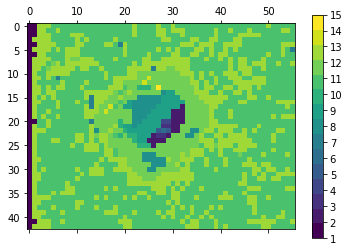

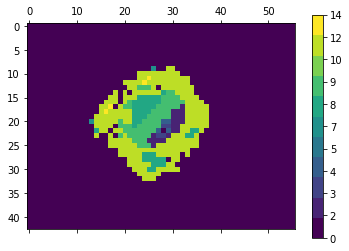

In [73]:
slided_1.segment(method="WPGMA", number_of_regions=15)
slided_1.plot_segments()

slided_1.filter_clusters(method='remove_singleton')
slided_1.filter_clusters(method='merge_background')
slided_1.filter_clusters(method='remove_islands')
slided_1.filter_clusters(method='remove_islands', minIslandSize=15)



slided_1.plot_segments()

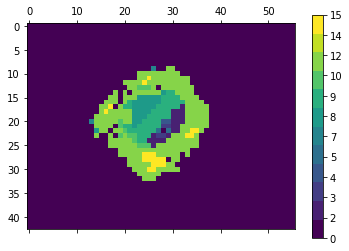

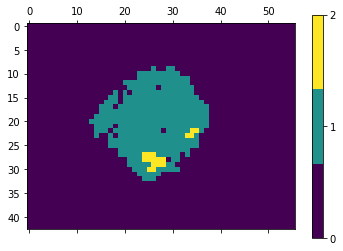

In [74]:
mask = slided_1.segmented == 8
mask[0:22,: ] = False
mask[:,0:22 ] = False
slided_1.segmented[mask] = 15
slided_1.plot_segments()
slided_1.plot_segments(highlight=[15])

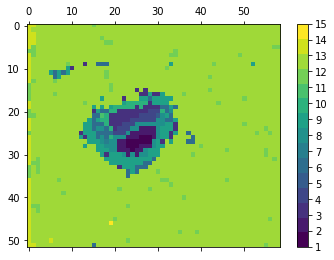

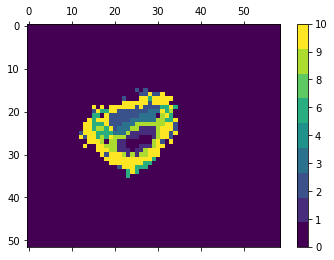

In [75]:
slided_5.segment(method="WPGMA", number_of_regions=15)
slided_5.plot_segments()

slided_5.filter_clusters(method='remove_singleton')
slided_5.filter_clusters(method='merge_background')
slided_5.filter_clusters(method='remove_islands')
slided_5.filter_clusters(method='remove_islands', minIslandSize=15)
slided_5.plot_segments()

In [76]:
slided_0.to_pickle("deresults/slideD_region_0.pickle")
slided_1.to_pickle("deresults/slideD_region_1.pickle")

In [77]:
slided_4.to_pickle("deresults/slideD_region_4.pickle")
slided_5.to_pickle("deresults/slideD_region_5.pickle")

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [78]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [79]:
combSpec.consensus_similarity()

In [80]:
combSpec.consensus_similarity_matrix

(slided_0, 0)  (slided_0, 1)  (slided_0, 2)  (slided_0, 3)  \
(slided_0, 0)        1.000000       0.695436       0.863977       0.925801   
(slided_0, 1)        0.695436       1.000000       0.790356       0.791118   
(slided_0, 2)        0.863977       0.790356       1.000000       0.958977   
(slided_0, 3)        0.925801       0.791118       0.958977       1.000000   
(slided_0, 4)        0.934721       0.760136       0.895306       0.978298   
(slided_0, 5)        0.969945       0.736796       0.903227       0.951273   
(slided_0, 6)        0.901204       0.895901       0.942304       0.959670   
(slided_0, 7)        0.950761       0.779175       0.969613       0.978507   
(slided_0, 8)        0.936324       0.769445       0.969023       0.971495   
(slided_0, 9)        0.969104       0.741104       0.928157       0.963538   
(slided_1, 0)        0.977794       0.723225       0.893349       0.937239   
(slided_1, 2)        0.805635       0.633912       0.793778       0.886563   
(slided_1, 3)        0.782632       0.706334       0.881765       0.903552   
(slided_1, 4)        0.789098       0.670964       0.831599       0.885467   
(slided_1, 5)        0.837810       0.710442       0.884149       0.921184   
(slided_1, 7)        0.856408       0.765007       0.953005       0.932877   
(slided_1, 8)        0.813219       0.781367       0.976767       0.930471   
(slided_1, 9)        0.886340       0.732882       0.906056       0.943256   
(slided_1, 10)       0.906508       0.678692       0.830117       0.929466   
(slided_1, 12)       0.926219       0.769394       0.962957       0.981870   
(slided_1, 14)       0.893826       0.775589       0.930225       0.956276   
(slided_1, 15)       0.824245       0.764242       0.991803       0.939184   
(slided_4, 0)        0.995125       0.712081       0.881637       0.938422   
(slided_4, 1)        0.843898       0.740338       0.944157       0.952987   
(slided_4, 2)        0.822597       0.782662       0.993854       0.948129   
(slided_4, 3)        0.899780       0.787587       0.987269       0.985939   
(slided_4, 4)        0.763803       0.914067       0.948262       0.901026   
(slided_4, 5)        0.890115       0.846611       0.960576       0.982859   
(slided_4, 10)       0.921482       0.747052       0.927419       0.988552   
(slided_4, 11)       0.934566       0.789544       0.951661       0.978047   
(slided_4, 12)       0.943758       0.740933       0.891006       0.969721   
(slided_4, 13)       0.958824       0.762101       0.951232       0.982029   
(slided_5, 0)        0.970917       0.728136       0.900634       0.941387   
(slided_5, 1)        0.624550       0.535732       0.678278       0.747730   
(slided_5, 2)        0.729561       0.617759       0.787191       0.852966   
(slided_5, 3)        0.838543       0.784590       0.980884       0.950482   
(slided_5, 4)        0.858209       0.707630       0.875409       0.924472   
(slided_5, 6)        0.919007       0.723666       0.893038       0.963987   
(slided_5, 8)        0.847734       0.665553       0.828772       0.923998   
(slided_5, 9)        0.895216       0.767448       0.956871       0.978918   
(slided_5, 10)       0.902130       0.745297       0.923562       0.975216   

                (slided_0, 4)  (slided_0, 5)  (slided_0, 6)  (slided_0, 7)  \
(slided_0, 0)        0.934721       0.969945       0.901204       0.950761   
(slided_0, 1)        0.760136       0.736796       0.895901       0.779175   
(slided_0, 2)        0.895306       0.903227       0.942304       0.969613   
(slided_0, 3)        0.978298       0.951273       0.959670       0.978507   
(slided_0, 4)        1.000000       0.964818       0.947501       0.955857   
(slided_0, 5)        0.964818       1.000000       0.946084       0.979431   
(slided_0, 6)        0.947501       0.946084       1.000000       0.966903   
(slided_0, 7)        0.955857       0.979431       0.966903       1.000000   
(slided_0, 8)        0.924540       0

Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

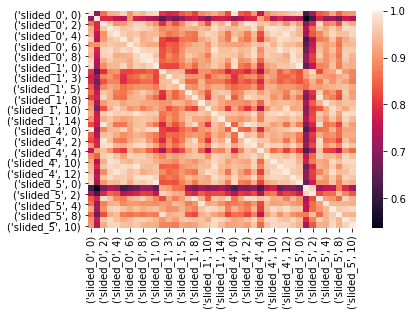

In [81]:
combSpec.plot_consensus_similarity()

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


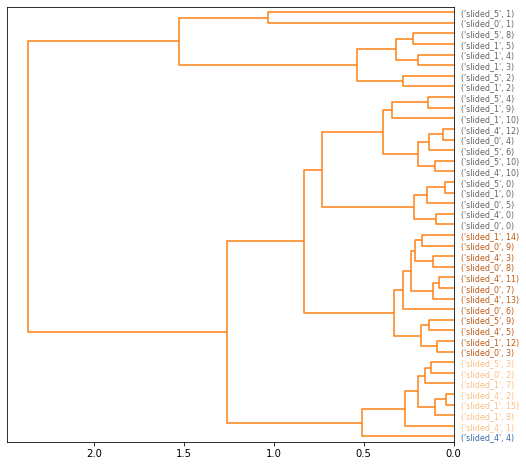

In [82]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

A detailed print out of the newly assigned cluster for each slide, region.

In [83]:
combSpec.region_cluster2cluster

{('slided_0', 0): 4,
 ('slided_0', 1): 9,
 ('slided_0', 2): 1,
 ('slided_0', 3): 3,
 ('slided_0', 4): 5,
 ('slided_0', 5): 4,
 ('slided_0', 6): 3,
 ('slided_0', 7): 3,
 ('slided_0', 8): 3,
 ('slided_0', 9): 3,
 ('slided_1', 0): 4,
 ('slided_1', 2): 7,
 ('slided_1', 3): 8,
 ('slided_1', 4): 8,
 ('slided_1', 5): 8,
 ('slided_1', 7): 1,
 ('slided_1', 8): 1,
 ('slided_1', 9): 6,
 ('slided_1', 10): 6,
 ('slided_1', 12): 3,
 ('slided_1', 14): 3,
 ('slided_1', 15): 1,
 ('slided_4', 0): 4,
 ('slided_4', 1): 1,
 ('slided_4', 2): 1,
 ('slided_4', 3): 3,
 ('slided_4', 4): 2,
 ('slided_4', 5): 3,
 ('slided_4', 10): 5,
 ('slided_4', 11): 3,
 ('slided_4', 12): 5,
 ('slided_4', 13): 3,
 ('slided_5', 0): 4,
 ('slided_5', 1): 10,
 ('slided_5', 2): 7,
 ('slided_5', 3): 1,
 ('slided_5', 4): 6,
 ('slided_5', 6): 5,
 ('slided_5', 8): 8,
 ('slided_5', 9): 3,
 ('slided_5', 10): 5}

The new assignment can also be plotted:

{0: 4, 1: 9, 2: 1, 3: 3, 4: 5, 5: 4, 6: 3, 7: 3, 8: 3, 9: 3}
{0: 4, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 3, 14: 3, 15: 1}
{0: 4, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 4, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 3, 10: 5}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 10.0: 10.0}


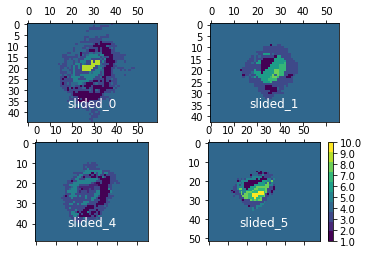

In [84]:
combSpec.plot_common_segments()

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 4, 1: 9, 2: 1, 3: 3, 4: 5, 5: 4, 6: 3, 7: 3, 8: 3, 9: 3}
{0: 4, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 3, 14: 3, 15: 1}
{0: 4, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 4, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 3, 10: 5}
{1.0: 1.0, 2.0: 2.0}


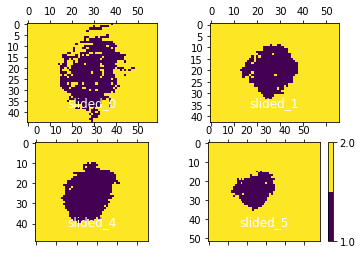

In [85]:
combSpec.plot_common_segments(highlight=(4))

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 is not present in slides 1 and 5!

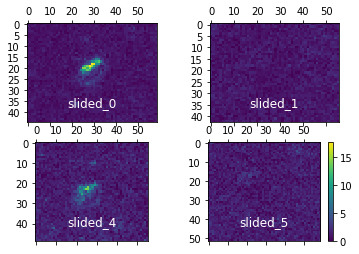

In [86]:
_ = combSpec.mass_heatmap(14954)

## A first DE Analysis: Tunica Media

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are controls.

We now compare the outer regions of both samples:

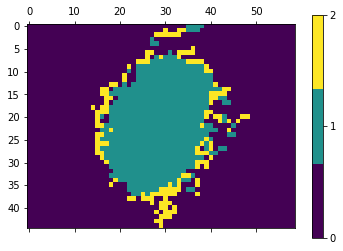

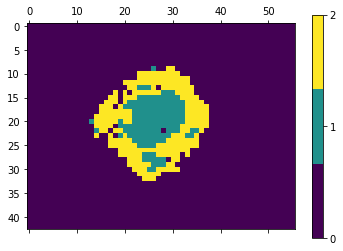

In [87]:
combSpec.regions["slided_0"].plot_segments(highlight=[8,9])
combSpec.regions["slided_1"].plot_segments(highlight=[12,14])

| | #                                                 | 3 Elapsed Time: 0:00:30


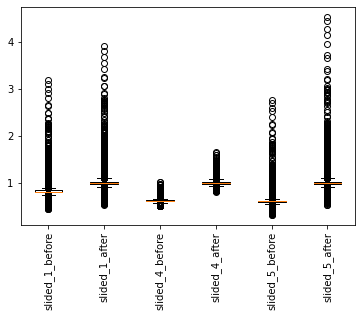

In [88]:
combSpec.get_internormed_regions()

In [89]:
print(np.median(combSpec.region_array_scaled["slided_1"]), np.median( combSpec.regions["slided_1"].region_array))

0.580888256062935 0.7120459492568951


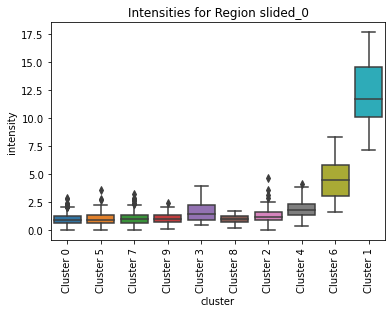

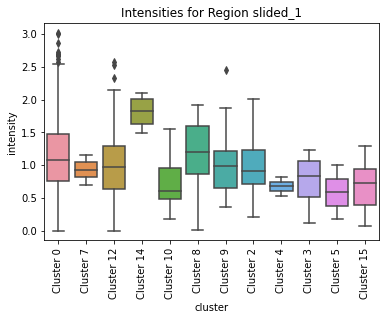

In [90]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=False)

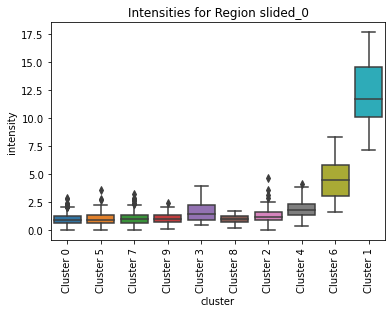

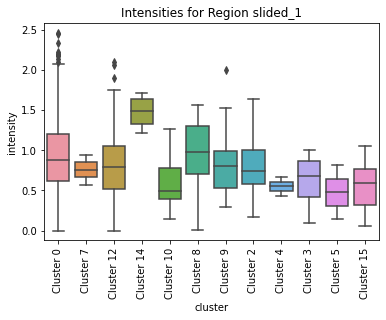

In [91]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=True)

In [92]:
resdf, expr, pdata = combSpec.find_markers("slided_0", [8,9], "slided_1", [12,14], pw, scaled=True)

100% (55 of 55) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (89 of 89) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (222 of 222) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


Running slided_0 [8, 9] against slided_1 [12, 14]


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [93]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14)))]

In [94]:
mydf = resdf["ttest"][('slided_0', (8,9,), 'slided_1', (12,14,))]

In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [95]:
from adjustText import adjust_text

In [96]:
pd.set_option('display.max_rows', None)
mydf

clusterID               gene_ident     gene_mass      gene  protein_mass  \
0    slided_0   mass_5679_336767354966   5679.336767    Tmsb4x        5679.4   
1    slided_0   mass_6539_542698949788   6539.542699    Uqcr11        6538.6   
2    slided_0  mass_6541_0518321631125   6541.051832    Uqcr11        6538.6   
3    slided_0   mass_6645_182023882486   6645.182024       Fau        6647.8   
4    slided_0   mass_6646_691157095811   6646.691157       Fau        6647.8   
5    slided_0   mass_6648_200290309134   6648.200290       Fau        6647.8   
6    slided_0   mass_8071_312910473903   8071.312910  Tmem167a        8073.8   
7    slided_0   mass_8072_822043687227   8072.822044  Tmem167a        8073.8   
8    slided_0   mass_8074_331176900551   8074.331177  Tmem167a        8073.8   
9    slided_0   mass_8075_840310113876   8075.840310  Tmem167a        8073.8   
10   slided_0   mass_8493_870210204694   8493.870210     Snrpg        8496.0   
11   slided_0   mass_8495_379343418017   8495.379343     Snrpg        8496.0   
12   slided_0   mass_8496_888476631342   8496.888477     Snrpg        8496.0   
13   slided_0   mass_8498_397609844666   8498.397610     Snrpg        8496.0   
14   slided_0   mass_8545_180739457719   8545.180739      Ubl5        8546.8   
15   slided_0   mass_8546_689872671042   8546.689873      Ubl5        8546.8   
16   slided_0   mass_8548_199005884366   8548.199006     Crip1        8549.7   
17   slided_0   mass_8548_199005884366   8548.199006      Ubl5        8546.8   
18   slided_0   mass_8549_708139097691   8549.708139     Crip1        8549.7   
19   slided_0   mass_8549_708139097691   8549.708139      Ubl5        8546.8   
20   slided_0   mass_8551_217272311014   8551.217272     Crip1        8549.7   
21   slided_0   mass_8564_799471230934   8564.799471    Minos1        8566.9   
22   slided_0   mass_8566_308604444257   8566.308604    Minos1        8566.9   
23   slided_0    mass_8567_81773765758   8567.817738    Minos1        8566.9   
24   slided_0   mass_8569_326870870906   8569.326871    Minos1        8566.9   
25   slided_0   mass_8613_091734057309   8613.091734     Hsbp1        8610.7   
26   slided_0   mass_8973_774572041806   8973.774572     Nedd8        8972.3   
27   slided_0    mass_8975_28370525513   8975.283705     Nedd8        8972.3   
28   slided_0   mass_8984_338504535075   8984.338505    Cox7a1        8986.3   
29   slided_0   mass_9292_201680053222   9292.201680    Cox7a2        9290.8   
30   slided_0   mass_9293_710813266545   9293.710813    Cox7a2        9290.8   
31   slided_0   mass_9296_729079693196   9296.729080      Coa6        9298.3   
32   slided_0   mass_9298_238212906519   9298.238213      Coa6        9298.3   
33   slided_0   mass_9299_747346119842   9299.747346      Coa6        9298.3   
34   slided_0   mass_9301_256479333168   9301.256479      Coa6        9298.3   
35   slided_0    mass_9323_89347753303   9323.893478    Ndufa4        9326.7   
36   slided_0   mass_9325_402610746354   9325.402611    Ndufa4        9326.7   
37   slided_0    mass_9326_91174395968   9326.911744    Ndufa4        9326.7   
38   slided_0   mass_9328_420877173005   9328.420877    Ndufa4        9326.7   
39   slided_0   mass_9328_420877173005   9328.420877    Ndufa3        9330.8   
40   slided_0   mass_9329_930010386328   9329.930010    Ndufa3        9330.8   
41   slided_0   mass_9331_439143599651   9331.439144    Ndufa3        9330.8   
42   slided_0   mass_9332_948276812976   9332.948277    Ndufa3        9330.8   
43   slided_0   mass_9349_548742159543   9349.548742      Hamp        9352.0   
44   slided_0   mass_9349_548742159543   9349.548742     Hamp2        9352.0   
45   slided_0   mass_9351_057875372868   9351.057875      Hamp        9352.0   
46   slided_0   mass_9351_057875372868   9351.057875     Hamp2        9352.0   
47   slided_0   mass_9352_567008586193   9352.567009      Hamp        9352.0   
48   slided_0   mass_9352_567008586193   9352.567009     Hamp2        9352.0   
49  

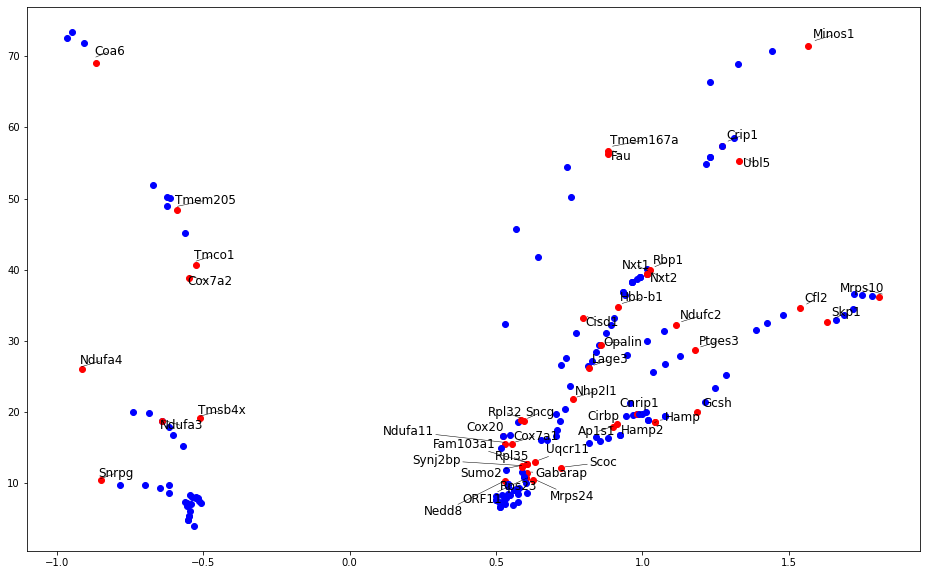

In [97]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf["avg_logFC"]), list(-np.log10(mydf["qvalue"])))]
dotgene = list(mydf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

![title](https://medicalartlibrary.com/wp-content/uploads/atherosclerosis-renal.jpg)

In this comparison the tunica media of atherosclerotic (slided_0) and control (slided_1) aorta was compared.
It must be noted, that the selected regions are considerably thicker in slided_1 compared to slided_0, but it is a known phenomenon that "The media underlying intimal athero- sclerotic plaque is considerably thinner" (Milutinović, A., Šuput, D., & Zorc-Pleskovič, R. (2020). Pathogenesis of atherosclerosis in the tunica intima, media, and adventitia of coronary arteries: An updated review. In Bosnian Journal of Basic Medical Sciences (Vol. 20, Issue 1, pp. 21–30). Association of Basic Medical Sciences of FBIH. https://doi.org/10.17305/bjbms.2019.4320 ).

However, due to the proximity to the background tissue (liver), for each mass it should be checked whether this mass is not also prevalent in the background tissue and therefore is present in the cluster due to diffusion, bad clustering, or other reasons. The mass_heatmap-function give a good and fast overview!

#### Tmsb4x -
First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
The diseased-aorta-media has significantly less Tmsb4x (-0.5).
This is not surprising, but was already found 5 years ago ( Zaima, N., Sasaki, T., Tanaka, H., Cheng, X. W., Onoue, K., Hayasaka, T., Goto-Inoue, N., Enomoto, H., Unno, N., Kuzuya, M., & Setou, M. (2011). Imaging mass spectrometry-based histopathologic examination of atherosclerotic lesions. Atherosclerosis, 217(2), 427–432. https://doi.org/10.1016/j.atherosclerosis.2011.03.044 ). Indeed, this can be seen as proof-of-concept.

#### Ptges3 +

On the contrary, there are other proteins, which are up-regulated in the atherosclerotic aorta.
Among these is Ptges3 (+1.25), which was shown to be involved in the inflammatory response of bovine endometrial epithelial cells.
Almughlliq, F. B., Koh, Y. Q., Peiris, H. N., Vaswani, K., Arachchige, B. J., Reed, S., & Mitchell, M. D. (2018). Eicosanoid pathway expression in bovine endometrial epithelial and stromal cells in response to lipopolysaccharide, interleukin 1 beta, and tumor necrosis factor alpha. Reproductive Biology, 18(4), 390–396. https://doi.org/10.1016/j.repbio.2018.10.001

Further proteins of interest include

#### Chchd4 +
Chchd4 was already identified as a biomarker for chronic obstructive pulmonary disease (COPD), a chronic inflammatory disease - in such, maybe? comparable to atherosclerosis.
Chchd4 affects the mitochondrial metabolism, being named in the p53-axis controlling tumor proliferation.

Maghsoudloo, M., Azimzadeh Jamalkandi, S., Najafi, A., & Masoudi-Nejad, A. (2020). An efficient hybrid feature selection method to identify potential biomarkers in common chronic lung inflammatory diseases. Genomics, 112(5), 3284–3293. https://doi.org/10.1016/j.ygeno.2020.06.010

#### Coa6 --

The respiratory metabolism appears to play an important role in atherosclerosis. Many regulated proteins fall into this category.
A Coa6 deficiency is known to be causing many disease phenotypes, including cardiomyopathy, encephalomyopathy, skeletal muscle myopathy, Leigh syndrome, metabolic acidosis and occasional hepatic failure.
In summary: Coa6 deficiency does not contribute to a healthy Aorta.

Ghosh, A., Trivedi, P. P., Timbalia, S. A., Griffin, A. T., Rahn, J. J., Chan, S. S. L., & Gohil, V. M. (2014). Copper supplementation restores cytochrome c oxidase assembly defect in a mitochondrial disease model of COA6 deficiency. Human Molecular Genetics, 23(13), 3596–3606. https://doi.org/10.1093/hmg/ddu069

#### Cst3 +

Serum Cystein3 is associated with subclinical atherosclerosis, which can also be seen in the middle of the IMS aorta. It also does not seem unlikely, that Cst3 is elsewhere upregulated in atherosclerotic aorta.

Chung, Y. K., Lee, Y. J., Kim, K. W., Cho, R. K., Chung, S. M., Moon, J. S., Yoon, J. S., Won, K. C., & Lee, H. W. (2018). Serum cystatin C is associated with subclinical atherosclerosis in patients with type 2 diabetes: A retrospective study. Diabetes and Vascular Disease Research, 15(1), 24–30. https://doi.org/10.1177/1479164117738156

#### Ndufa11 +, Cox7a2 -

This proteins is of interesting, and together with other identified proteins ( like Cox7a2 ), is part of the mitochondria.
Atherosclerosis therefore might have an effect on the energy metabolism, similar to an ischemic stroke: James, R., Searcy, J. L., Le Bihan, T., Martin, S. F., Gliddon, C. M., Povey, J., Deighton, R. F., Kerr, L. E., McCulloch, J., & Horsburgh, K. (2012). Proteomic analysis of mitochondria in APOE transgenic mice and in response to an ischemic challenge. Journal of Cerebral Blood Flow and Metabolism, 32(1), 164–176. https://doi.org/10.1038/jcbfm.2011.120 

#### Ndufb6 +

Ndufb6 was identified to being critical for the development of PM2.5-induced fibrosis in mouse lungs. Therefore it is likely related to inflammatory processes.

Han, X., Liu, H., Zhang, Z., Yang, W., Wu, C., Liu, X., Zhang, F., Sun, B., Zhao, Y., Jiang, G., Yang, Y. G., & Ding, W. (2020). Epitranscriptomic 5-Methylcytosine Profile in PM2.5-induced Mouse Pulmonary Fibrosis. Genomics, Proteomics and Bioinformatics, 18(1), 41–51. https://doi.org/10.1016/j.gpb.2019.11.005



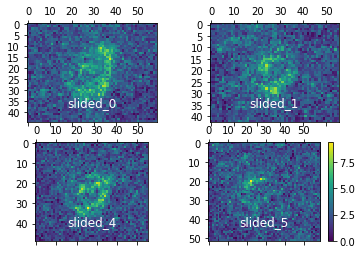

In [98]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

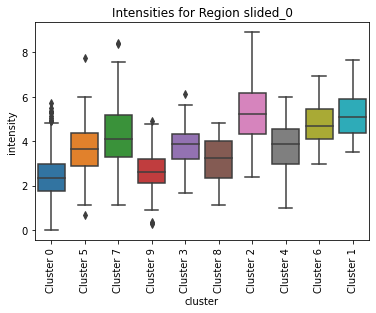

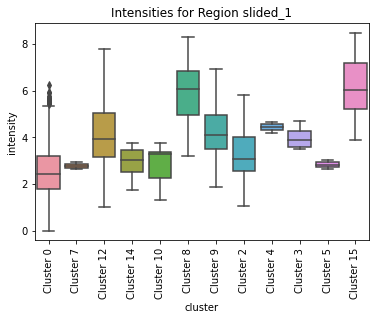

In [99]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

Ap1s1


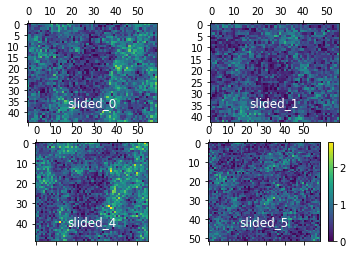

Cfl1


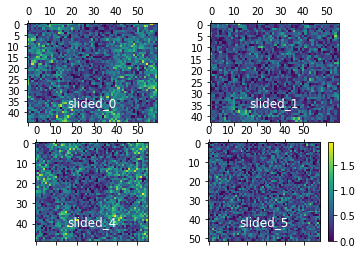

Cfl2


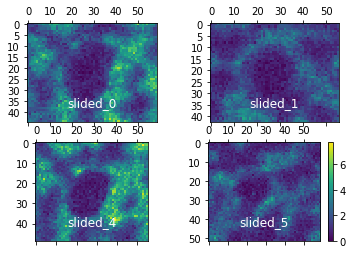

Chchd4


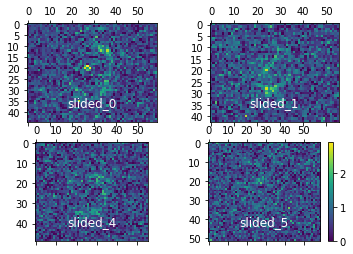

Cirbp


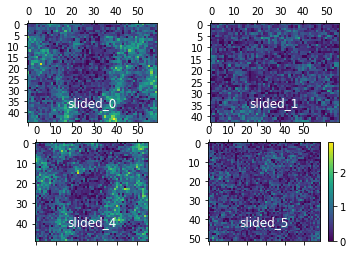

Cisd1


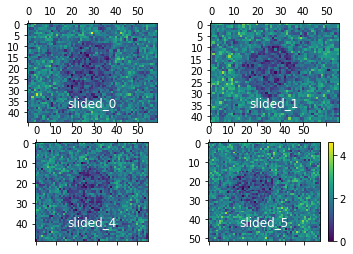

Cnrip1


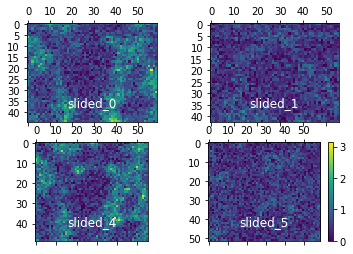

Coa6


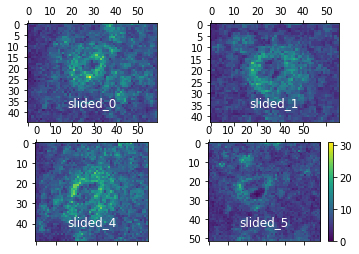

Cox20


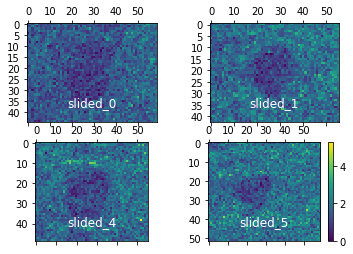

Cox7a1


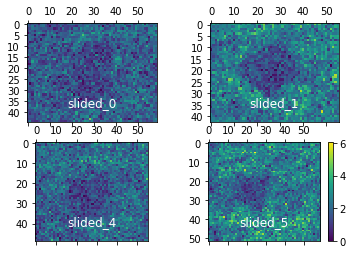

Cox7a2


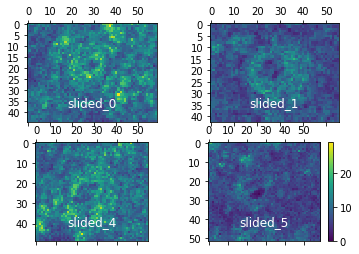

Crip1


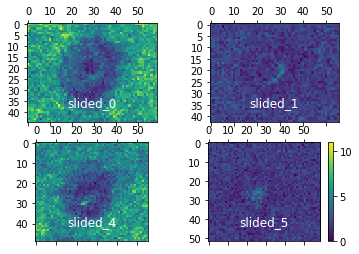

Cst3


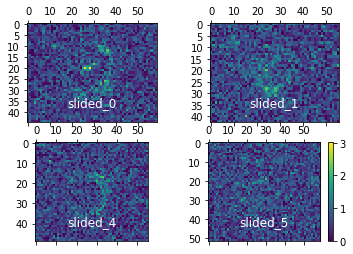

Dbi


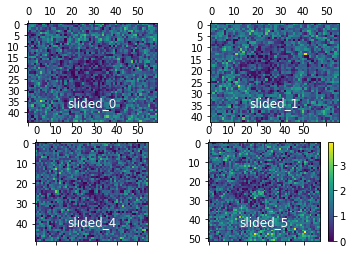

Fam103a1


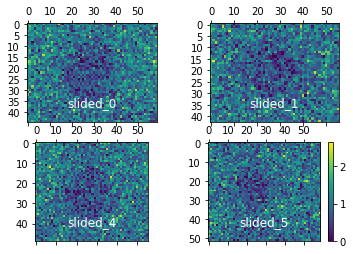

Fam195b


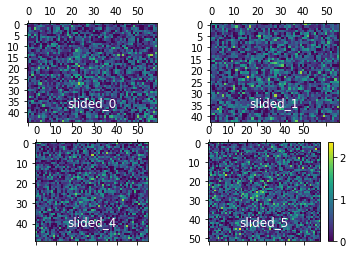

Fau


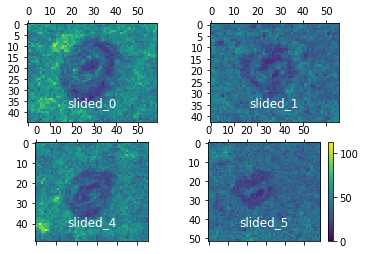

Gabarap


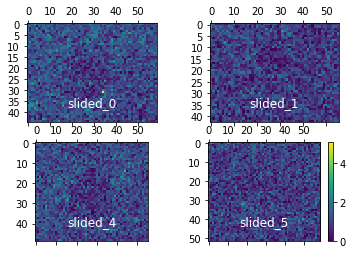

Gcsh


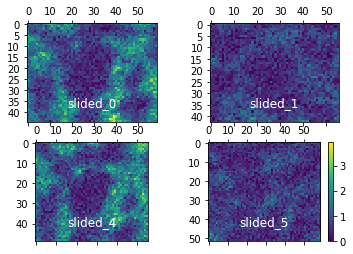

Hamp


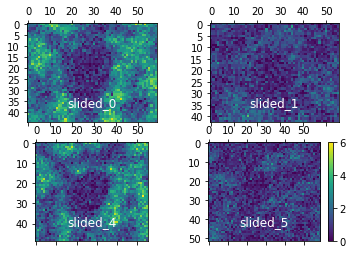

Hamp2


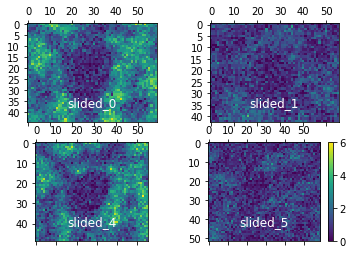

Hbb-b1


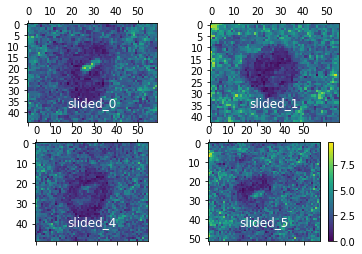

Hsbp1


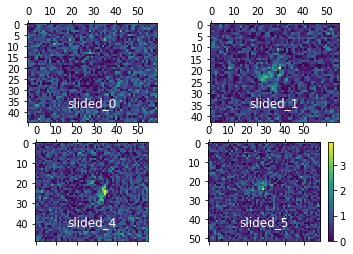

Lage3


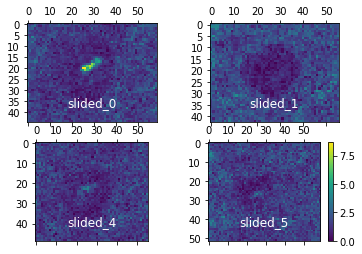

Mdp1


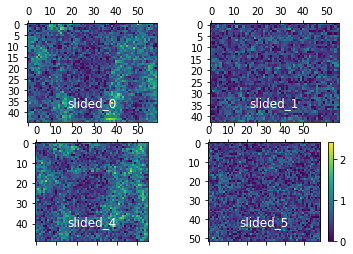

Minos1


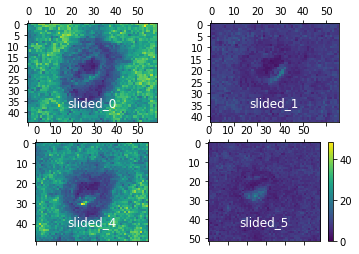

Mrfap1


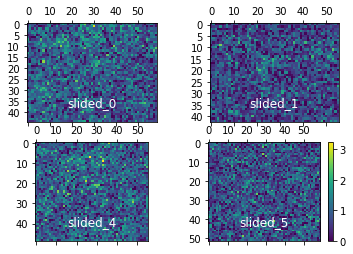

Mrps10


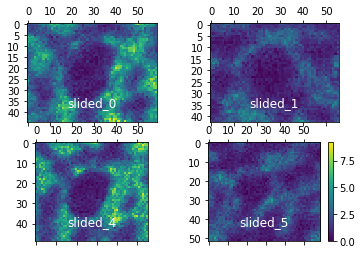

Mrps24


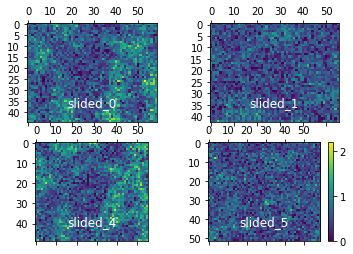

Mrps36


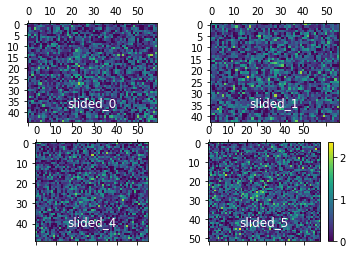

Ndufa11


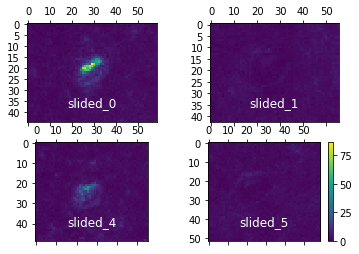

Ndufa3


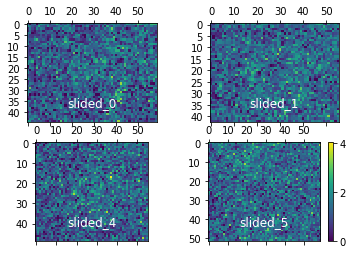

Ndufa4


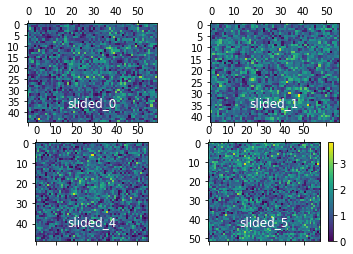

Ndufc2


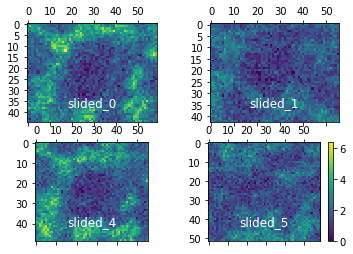

Nedd8


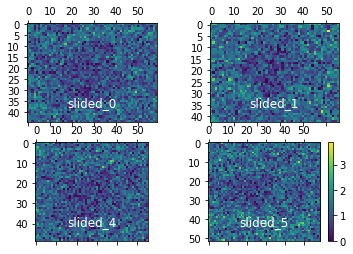

Nhp2l1


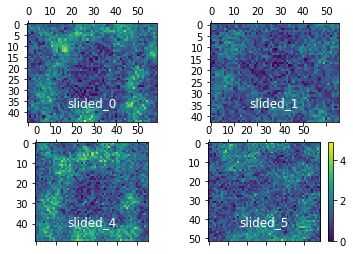

Nutf2


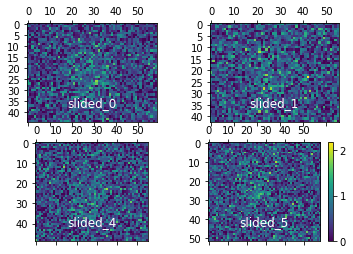

Nxt1


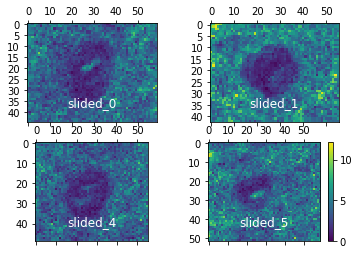

Nxt2


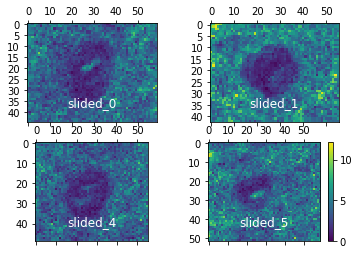

ORF11


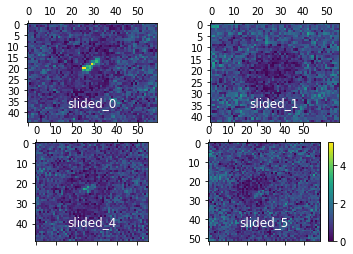

Opalin


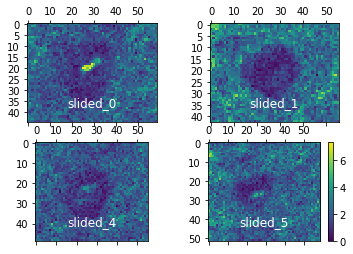

Ptges3


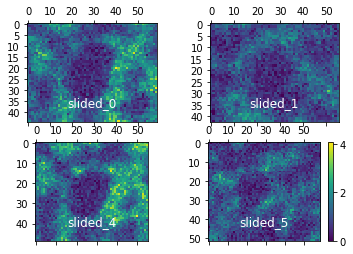

Rbp1


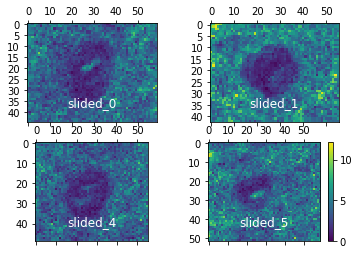

Rpl21


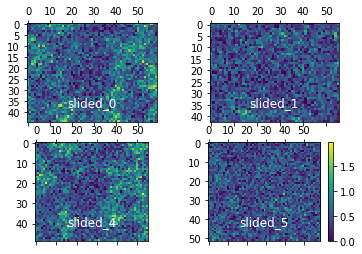

Rpl32


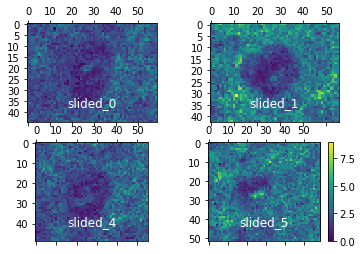

Rpl35


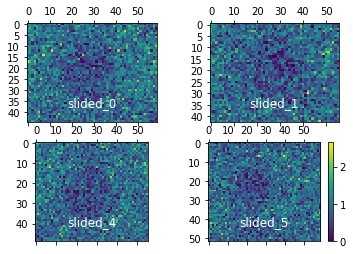

Rps23


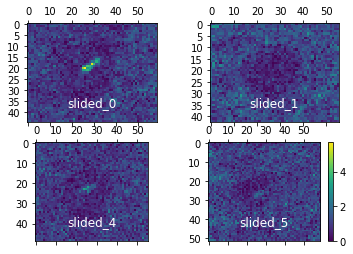

Scoc


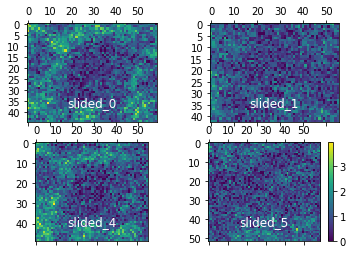

Skp1


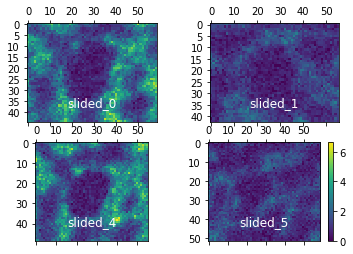

Snca


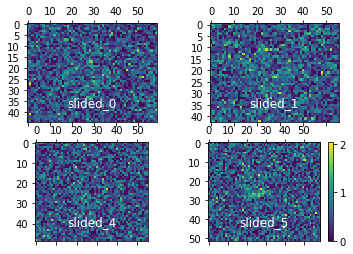

Sncg


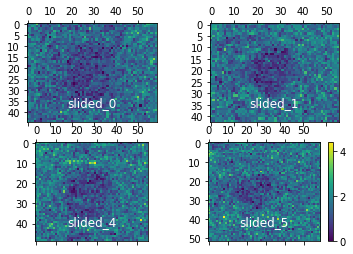

Snrpd3


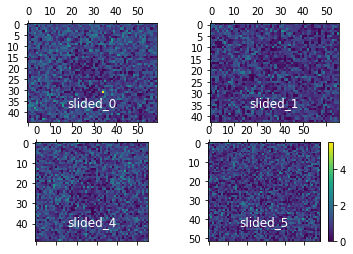

Snrpg


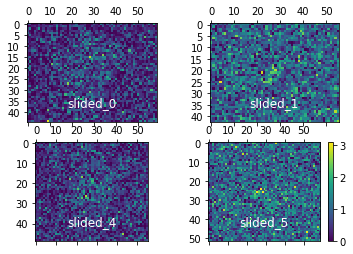

Sumo2


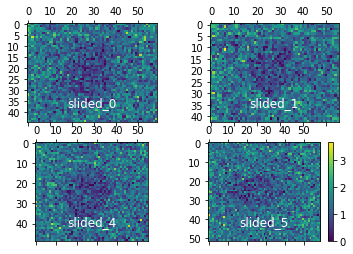

Synj2bp


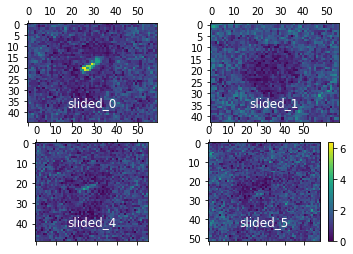

Tmco1


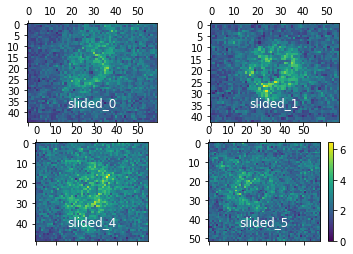

Tmem167a


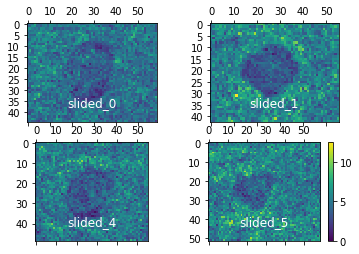

Tmem205


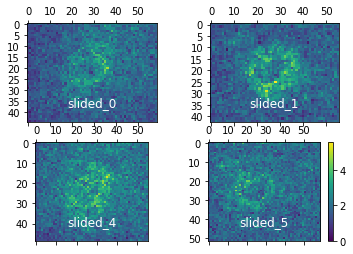

Tmsb4x


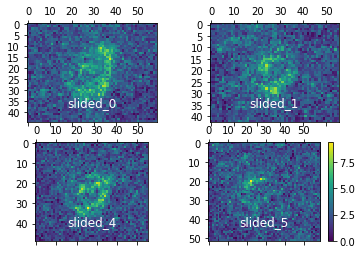

Tomm22


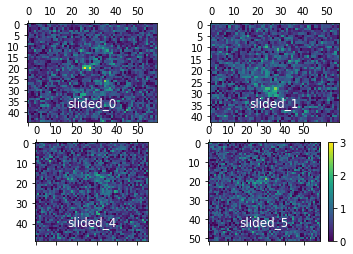

Ube2g2


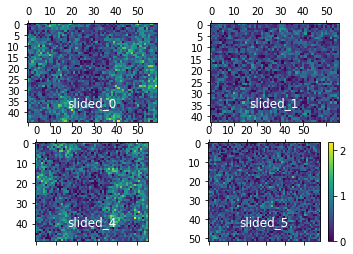

Ubl5


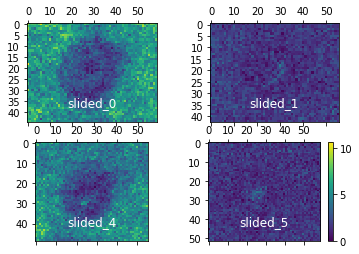

Uqcr11


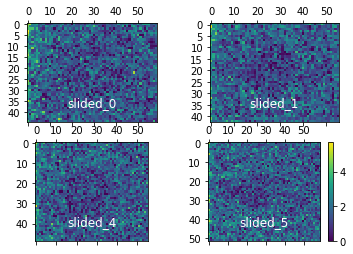

Vamp8


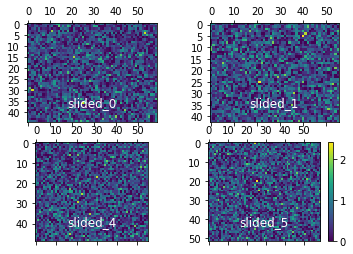

In [100]:
for gene in np.unique(mydf["gene"]):
    print(gene)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(gene), scaled=True)

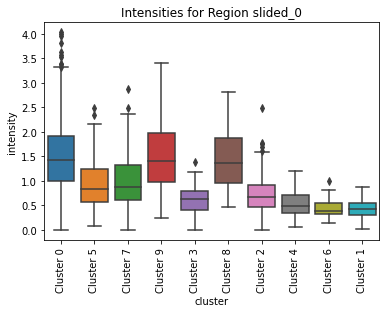

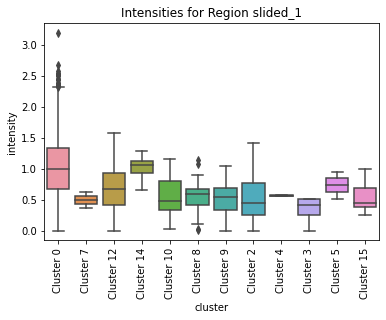

In [101]:
combSpec.mass_intensity(pw.protein2mass.get("Ptges3"), regions=["slided_0", "slided_1"], scaled=True)

## Another DE Analysis: whole Aorta

Having spotted several differences between the Tunica media of atherosclerotic and suspected healthy aorta, a full comparison might also be of interest.

For this, all slided_0 and slided_1 regions are compared  - with the exception of the backgrounds.

In [102]:
slided_0_regions = tuple(sorted([x for x in np.unique(slided_0.segmented) if x > 0]))
slided_1_regions = tuple(sorted([x for x in np.unique(slided_1.segmented) if x > 0]))

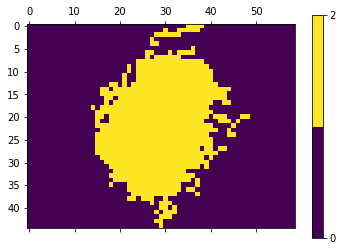

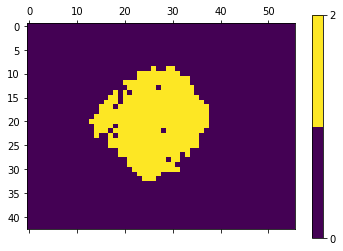

In [103]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_regions)

In [104]:
resdf_all, expr, pdata = combSpec.find_markers("slided_0", slided_0_regions, "slided_1", slided_1_regions, pw, scaled=True)

100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (150 of 150) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (51 of 51) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (70 of 70) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (100 of 100) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (27 of 27) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 161) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Running slided_0 (1, 2, 3, 4, 5, 6, 7, 8, 9) against slided_1 (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)


100% (161 of 161) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (55 of 55) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (89 of 89) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (21 of 21) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (28 of 28) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (50 of 50) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (13 of 13) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (222 of 222) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (4 of 4) |#########################

In [105]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('ttest',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)))]

In [106]:
mydf_all = resdf_all["ttest"][('slided_0', slided_0_regions, 'slided_1', slided_1_regions)]

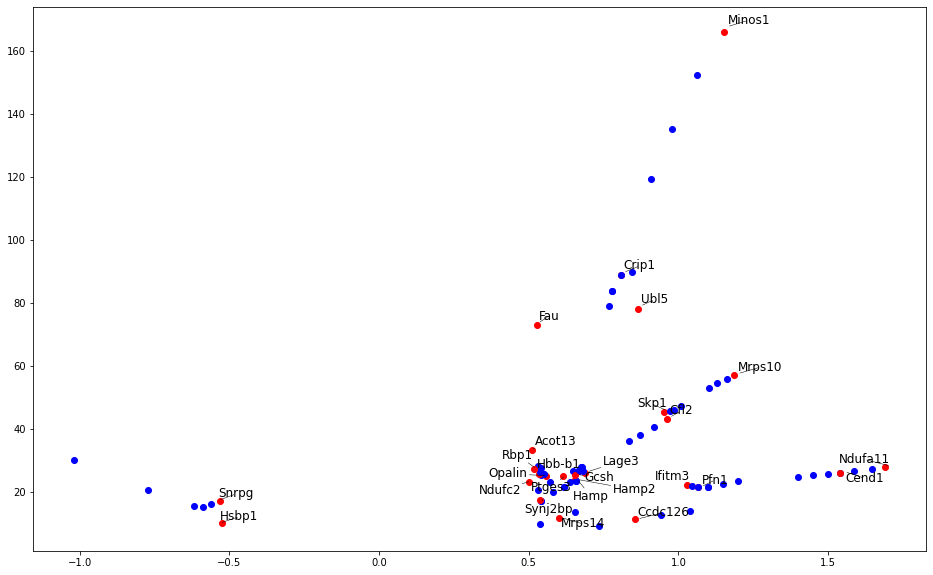

In [107]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_all["avg_logFC"]), list(-np.log10(mydf_all["qvalue"])))]
dotgene = list(mydf_all["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

The comparison of both aorta results again in several differential proteins.

Again, several proteins involved in the respiratory metabolism are listed, like Ndufc2, Ndufa11.

Of interest here are Ifitm3, Ccdc126 and Ubl5, which are all located in the inner part of the aorta.

#### Ifitm3

Known gene involved in the innate immune system (T cells): Yánez, D. C., Ross, S., & Crompton, T. (2020). The IFITM protein family in adaptive immunity. In Immunology (Vol. 159, Issue 4, pp. 365–372). Blackwell Publishing Ltd. https://doi.org/10.1111/imm.13163

Ifitm3 is involved in the plaque uptake in Alzheimer's disease: Hur, J. Y., Frost, G. R., Wu, X., Crump, C., Pan, S. J., Wong, E., Barros, M., Li, T., Nie, P., Zhai, Y., Wang, J. C., Tcw, J., Guo, L., McKenzie, A., Ming, C., Zhou, X., Wang, M., Sagi, Y., Renton, A. E., … Li, Y. M. (2020). The innate immunity protein IFITM3 modulates γ-secretase in Alzheimer’s disease. Nature, 1–6. https://doi.org/10.1038/s41586-020-2681-2


#### Mrps14

Mrps14 effects the mitochondrial translation. 
Hence, again, a disturbation of mitochondrial work can be observed.

Jackson, C. B., Huemer, M., Bolognini, R., Martin, F., Szinnai, G., Donner, B. C., Richter, U., Battersby, B. J., Nuoffer, J. M., Suomalainen, A., & Schaller, A. (2019). A variant in MRPS14 (uS14m) causes perinatal hypertrophic cardiomyopathy with neonatal lactic acidosis, growth retardation, dysmorphic features and neurological involvement. Human Molecular Genetics, 28(4), 639–649. https://doi.org/10.1093/hmg/ddy374

#### Acot13

In chicken it was observed that an Acot13 decreases works as inhibitor during Preadipocytes Differentiation.
Hence, an upregulation of Acot13 leads to an increase in preadipocyte differentiation, which also plays a role in plaque formation.


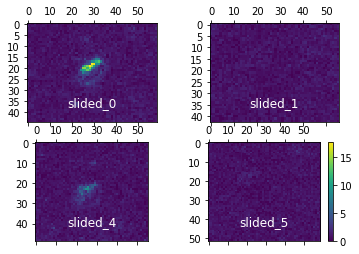

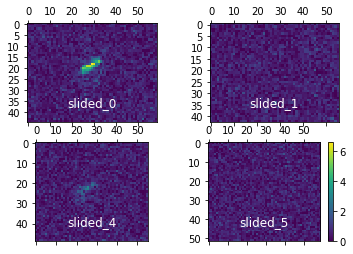

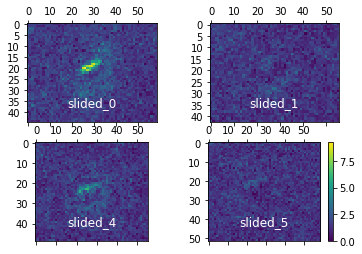

In [186]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ifitm3"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Mrps14"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Acot13"), scaled=True)

Cend1


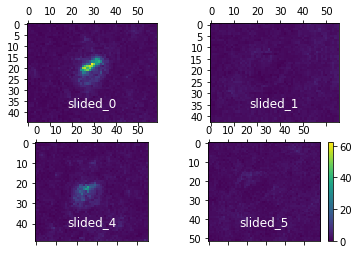

Acot13


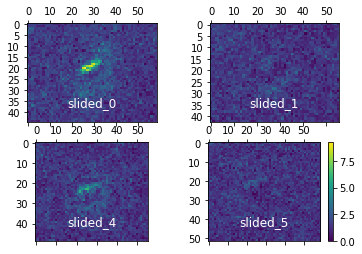

Ptges3


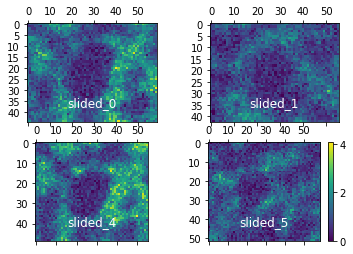

Pfn1


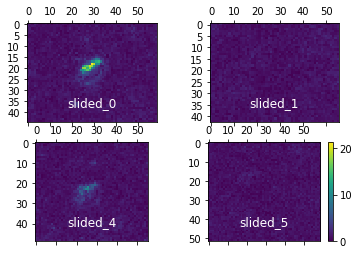

Synj2bp


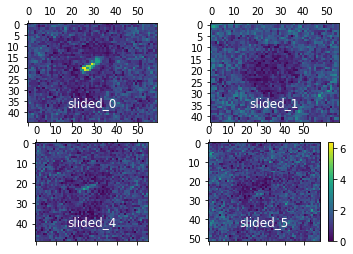

Rbp1


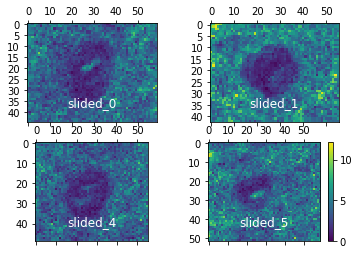

Snrpg


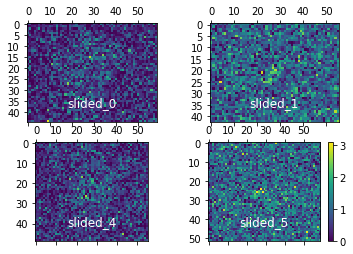

Ndufc2


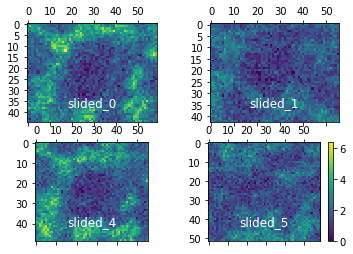

Ifitm3


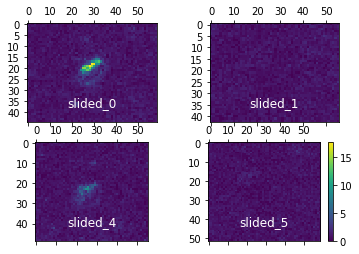

Lage3


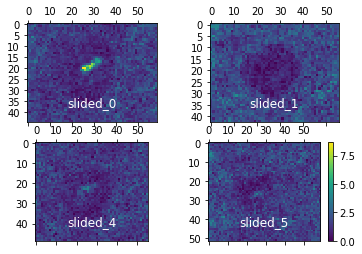

Gcsh


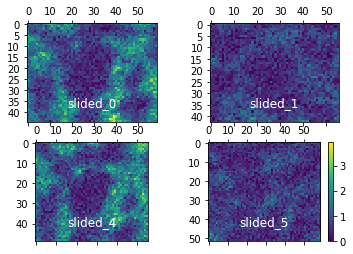

Hbb-b1


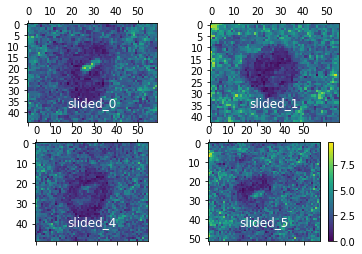

Crip1


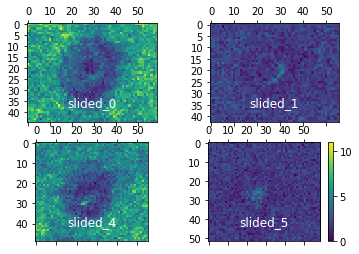

Mrps14


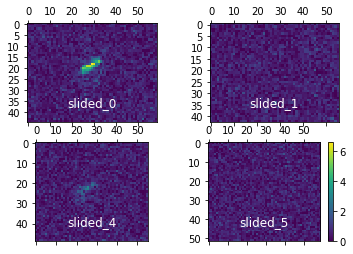

Ndufa11


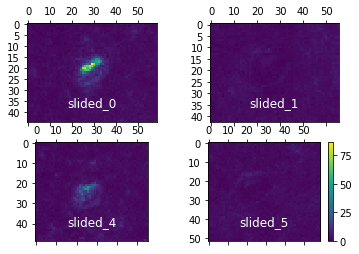

Ccdc126


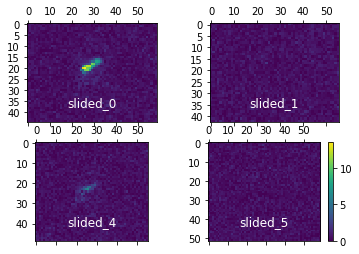

Hamp2


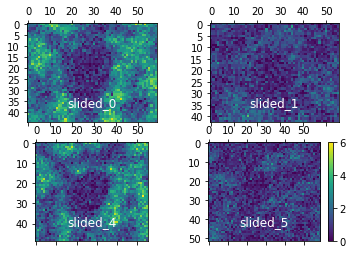

Minos1


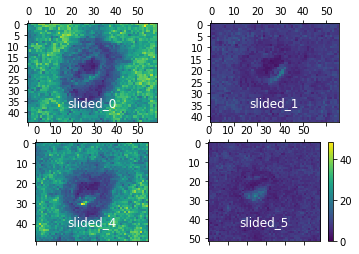

Ubl5


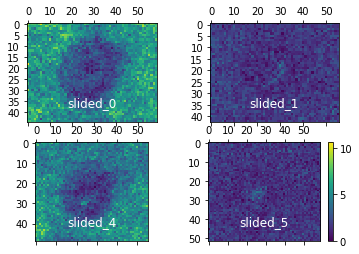

Hsbp1


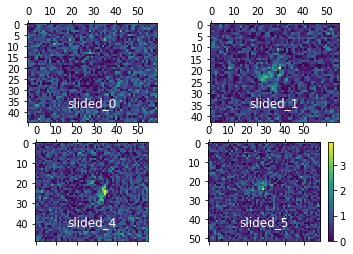

Cfl2


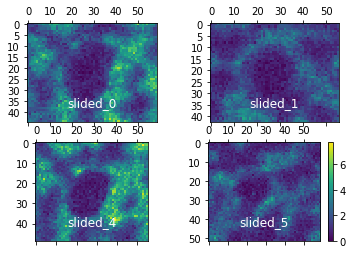

Opalin


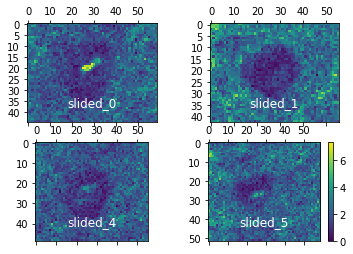

Skp1


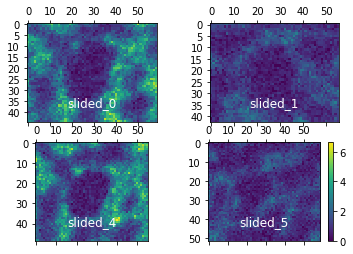

Fau


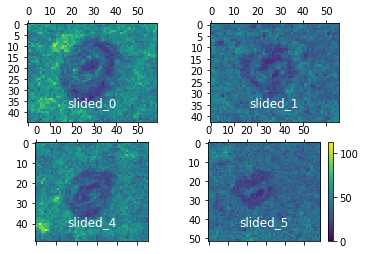

Hamp


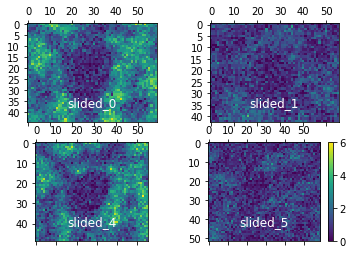

Mrps10


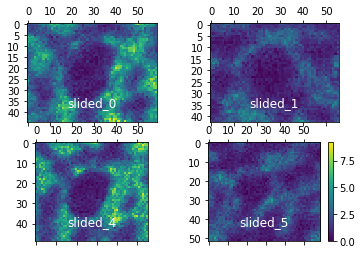

In [185]:
for x in set(mydf_all["gene"]):
    print(x)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(x), scaled=True)

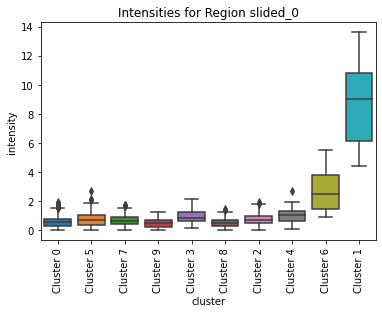

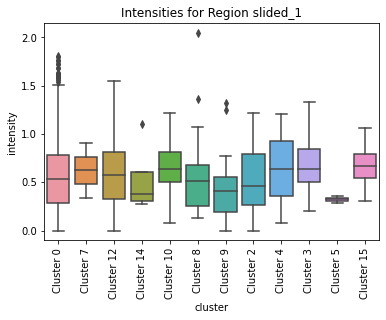

In [108]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

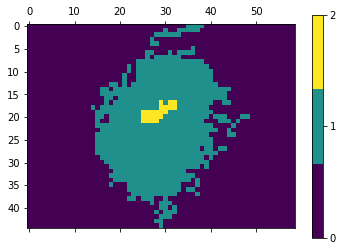

In [109]:
combSpec.regions["slided_0"].plot_segments(highlight=1)

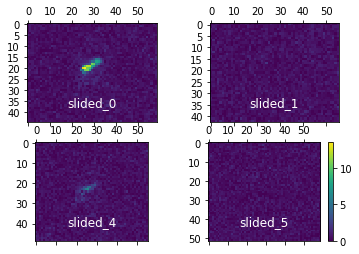

In [110]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

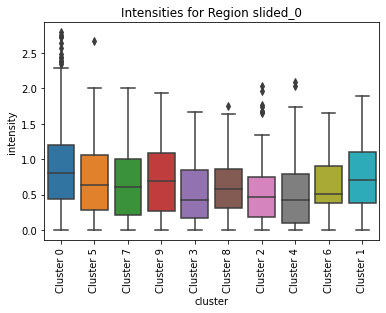

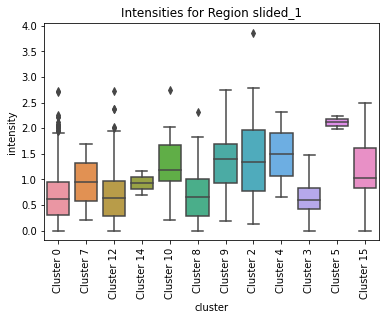

In [111]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

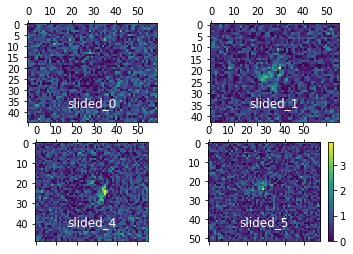

In [112]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)

## The core DE

In [201]:
slided_0_inner_regions = tuple([1,3,4,6])
slided_1_inner_regions = tuple([2,3,7,8,9])

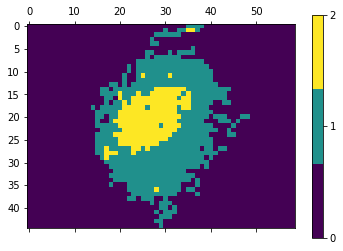

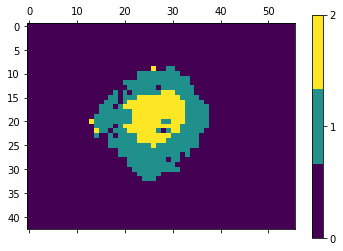

In [197]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_inner_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_inner_regions)

In [199]:
resdf_inner, expr, pdata = combSpec.find_markers("slided_0", slided_0_inner_regions, "slided_1", slided_1_inner_regions, pw, scaled=True)

100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (51 of 51) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (70 of 70) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (27 of 27) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (21 of 21) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (28 of 28) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (50 of 50) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Running slided_0 [1, 3, 4, 6] against slided_1 [2, 3, 7, 8, 9]


In [202]:
mydf_inner = resdf_inner["ttest"][('slided_0', slided_0_inner_regions, 'slided_1', slided_1_inner_regions)]

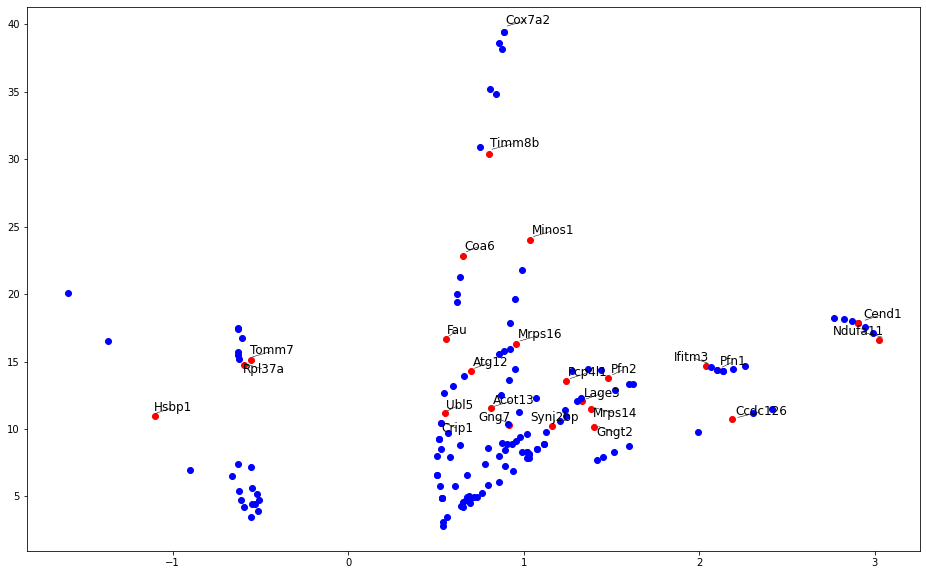

In [203]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_inner["avg_logFC"]), list(-np.log10(mydf_inner["qvalue"])))]
dotgene = list(mydf_inner["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

Again the same candidates as previously shown can be seen.

Mrps14, Ccdc126, Ndufa11 - which mostly relate to mitochondrial activity.


#### Timm8b
Likewise is Timm8b significantly upregulated.

Timm8b is found to be upregulated in colon mucosa cardinogenesis of diabetes type 2 patients, and is associated with mitochondrial dysfunction.
A similar pattern might be observable in atherosclerosis as well.

Del Puerto-Nevado, L., Santiago-Hernandez, A., Solanes-Casado, S., Gonzalez, N., Ricote, M., Corton, M., Prieto, I., Mas, S., Sanz, A. B., Aguilera, O., Gomez-Guerrero, C., Ayuso, C., Ortiz, A., Rojo, F., Egido, J., Garcia-Foncillas, J., Minguez, P., & Alvarez-Llamas, G. (2019). Diabetes-mediated promotion of colon mucosa carcinogenesis is associated with mitochondrial dysfunction. Molecular Oncology, 13(9), 1887–1897. https://doi.org/10.1002/1878-0261.12531

## GO analysis for plaque-DE experiment

In [114]:
! wget http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz

--2020-09-29 15:48:45--  http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7967252 (7.6M) [application/octet-stream]
Saving to: ‘goa_human.gaf.gz’

goa_human.gaf.gz    100%[===================>]   7.60M  1.41MB/s    in 5.6s    

2020-09-29 15:48:51 (1.37 MB/s) - ‘goa_human.gaf.gz’ saved [7967252/7967252]



In [124]:
! wget 'http://purl.obolibrary.org/obo/go/go-basic.obo'

--2020-09-29 15:53:39--  http://purl.obolibrary.org/obo/go/go-basic.obo
Resolving purl.obolibrary.org (purl.obolibrary.org)... 52.3.123.63
Connecting to purl.obolibrary.org (purl.obolibrary.org)|52.3.123.63|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://current.geneontology.org/ontology/go-basic.obo [following]
--2020-09-29 15:53:39--  http://current.geneontology.org/ontology/go-basic.obo
Resolving current.geneontology.org (current.geneontology.org)... 13.227.134.38, 13.227.134.94, 13.227.134.201, ...
Connecting to current.geneontology.org (current.geneontology.org)|13.227.134.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30999218 (30M) [text/obo]
Saving to: ‘go-basic.obo’

go-basic.obo        100%[===================>]  29.56M  3.82MB/s    in 8.0s    

2020-09-29 15:53:47 (3.71 MB/s) - ‘go-basic.obo’ saved [30999218/30999218]



In [141]:
import gzip
import Bio.UniProt.GOA as GOA
from goatools.go_enrichment import GOEnrichmentStudy
from goatools import obo_parser

goa_human = "goa_human.gaf.gz"

# File is a gunzip file, so we need to open it in this way
with gzip.open(goa_human, 'rt') as arab_gaf_fp:
    human_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        human_funcs[uniprot_id] = entry

        
go = obo_parser.GODag("go-basic.obo")


go-basic.obo: fmt(1.2) rel(2020-09-10) 47,314 GO Terms


In [145]:
for i,x in enumerate(human_funcs):
    if x.startswith("CCL"):
        print(i,x, human_funcs[x])
        break

1149 CCL24 {'DB': 'UniProtKB', 'DB_Object_ID': 'O00175', 'Qualifier': [''], 'GO_ID': 'GO:2000418', 'DB:Reference': ['GO_REF:0000107'], 'Evidence': 'IEA', 'With': ['UniProtKB:Q9JKC0', 'ensembl:ENSMUSP00000004936'], 'Aspect': 'P', 'DB_Object_Name': 'C-C motif chemokine 24', 'Synonym': ['CCL24', 'MPIF2', 'SCYA24'], 'DB_Object_Type': 'protein', 'Taxon_ID': ['taxon:9606'], 'Date': '20200714', 'Assigned_By': 'Ensembl', 'Annotation_Extension': '', 'Gene_Product_Form_ID': ''}


In [146]:
keyword = 'growth'
growth_dict = {x: human_funcs[x]
               for x in human_funcs 
               if keyword in human_funcs[x]['DB_Object_Name']}

In [147]:


print('UniProt IDs of annotations with "growth" in their name:')

print("Total: {}".format(len(growth_dict)))



UniProt IDs of annotations with "growth" in their name:
Total: 143


In [170]:

pop = [x.upper() for x in pw.protein2mass]
assoc = {}

for x in human_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(human_funcs[x]['GO_ID']))

methods = ["bonferroni", "fdr"]



In [180]:
study = list(set([x.upper() for x in mydf["gene"]])) #mydf_all

In [181]:
g = GOEnrichmentStudy(pop, assoc, go,
                         propagate_counts=True,
                         alpha=0.05,
                         methods=['bonferroni', 'fdr_bh'])
g_res = g.run_study(study)




Load GOEA Gene Ontology Analysis ...
Propagating term counts up: is_a
 91%  4,892 of  5,371 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 64 IDs ... 89%     57 of     64 study items found in association
100%     64 of     64 study items found in population(5371)
Calculating 5,176 uncorrected p-values using fisher
   5,176 GO terms are associated with  4,892 of  5,371 population items
     392 GO terms are associated with     57 of     64 study items
  METHOD bonferroni:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): local bonferroni
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (pu

In [183]:
for x in sorted(g_res, key=lambda x: (x.study_count, -x.p_uncorrected), reverse=True):
    if x.study_count > 1:
        print(x.study_count, x)

34 GO:0008150	BP	e	biological_process            	34/64	2495/5371	0.314	0	34	1	1	AP1S1, CHCHD4, CNRIP1, COA6, COX20, COX7A1, COX7A2, CRIP1, DBI, FAU, GABARAP, GCSH, HAMP, HSBP1, LAGE3, MRPS10, MRPS24, MRPS36, NDUFA11, NDUFA3, NDUFC2, NEDD8, NUTF2, NXT2, OPALIN, PTGES3, RPS23, TMCO1, TMEM167A, TMSB4X, TOMM22, UBE2G2, UBL5, VAMP8
21 GO:0009987	BP	e	cellular process              	21/64	1128/5371	0.0292	1	21	1	1	CHCHD4, COA6, COX20, COX7A1, COX7A2, CRIP1, GABARAP, GCSH, LAGE3, MRPS10, MRPS24, MRPS36, NDUFA11, NDUFA3, NDUFC2, NEDD8, PTGES3, TMCO1, TMEM167A, TOMM22, VAMP8
15 GO:0005575	CC	p	cellular_component            	15/64	1391/5371	0.774	0	15	1	1	CFL1, CFL2, CST3, MRFAP1, NXT1, RPL21, RPL32, RPL35, SCOC, SKP1, SNCA, SNRPD3, SYNJ2BP, TMEM205, UQCR11
9 GO:0110165	CC	p	cellular anatomical entity    	9/64	1058/5371	0.342	1	9	1	1	CFL1, CFL2, CST3, MRFAP1, RPL32, SCOC, SNCA, TMEM205, UQCR11
8 GO:0043933	BP	e	protein-containing complex subunit organization	8/64	152/5371	0.000395	4	8	1	1	COX20,